- Student Name : Mohit Patil 
- Registered Email-ID : mohitz4418@gmail.com

# Assignment: Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Step 1 : Import necessary libraries and  warnings.

In [1]:
# Importing all necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
# Filtering out the warnings.

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns",200)

## Step 2 : Reading and Understanding the dataset.

In [4]:
# Reading the "train.csv" dataset.

Housing_Data = pd.read_csv("C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Assignment - Advanced Regression\\train.csv")

In [5]:
# Displaying top 5 records from "train.csv" dataset. 

Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Displaying last 5 records from "train.csv" dataset.

Housing_Data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# Determining the shape of dataset.

Housing_Data.shape

(1460, 81)

In [8]:
# Describe the data.

Housing_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Understanding the data.

Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Check the columns names from dataframe.

Housing_Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 3 : Data Prepration - I

### 3.1. Drop columns that are having high percentage of missing values. Check all the columns before dropping   them.

In [11]:
# Check the missing percentage of missing values in dataset columns.

Housing_Data_null_count = round(Housing_Data.isnull().sum() * 100 / len(Housing_Data), 2).sort_values(ascending = False)
Housing_Data_null_count

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [12]:
# Removing the columns which have more than 45% of null values.

Housing_Data = Housing_Data.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis = 1)
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
# Check the shape of dataset.

Housing_Data.shape

(1460, 76)

In [14]:
# Again Check the missing percentage of missing values in dataset after dropping columns.

Housing_Data_null_count = round(Housing_Data.isnull().sum() * 100 / len(Housing_Data), 2).sort_values(ascending = False).head(15)
Housing_Data_null_count

LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofStyle        0.00
dtype: float64

### 3.2. For the columns with less percentage of missing values. Use some imputation technique.

#### For continous variables, try to impute the missing values with mean or median. Perform EDA to find out which one fits best.

#### 1. LotFrontage 

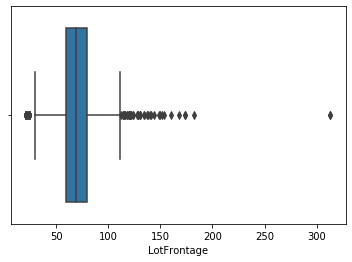

In [15]:
# Plot a boxplot to check the skewness of data in column so we can decide to use mean or median.

sns.boxplot(Housing_Data.LotFrontage)
plt.show()

In [16]:
# For "LotFrontage" column check imputation value.

Housing_Data["LotFrontage"].median()

69.0

In [17]:
# Imputing the value in "LotFrontage" columns.

Housing_Data["LotFrontage"] = Housing_Data["LotFrontage"].fillna(69.0)

#### 2. GarageYrBlt

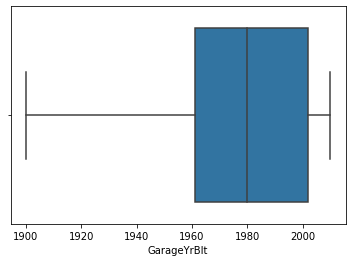

In [18]:
# Plot a boxplot to check the skewness of data in column so we can decide to use mean or median.

sns.boxplot(Housing_Data.GarageYrBlt)
plt.show()

In [19]:
# For "GarageYrBlt" column check imputation value.

Housing_Data["GarageYrBlt"].mean()

1978.5061638868744

#### Notice imputing GarageYrBlt_Old with -1 as these house do not have garage

In [20]:
# Imputing the value in "GarageYrBlt" columns.

Housing_Data["GarageYrBlt"] = Housing_Data["GarageYrBlt"].fillna(-1)

#### 3. MasVnrArea

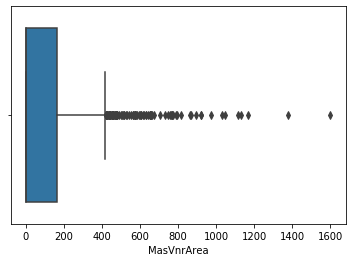

In [21]:
# Plot a boxplot to check the skewness of data in column so we can decide to use mean or median.

sns.boxplot(Housing_Data.MasVnrArea)
plt.show()

In [22]:
# For "MasVnrArea" column check imputation value.

Housing_Data["MasVnrArea"].median()

0.0

In [23]:
# Imputing the value in "MasVnrArea" columns.

Housing_Data["MasVnrArea"] = Housing_Data["MasVnrArea"].fillna(0.0)

#### For Categorical columns imputation - check all categories carefully.

In [24]:
# Imputing the values in categorical columns.

Housing_Data["GarageFinish"] = Housing_Data["GarageFinish"].fillna("No Garage")
Housing_Data["GarageType"] = Housing_Data["GarageType"].fillna("No Garage")
Housing_Data["GarageCond"] = Housing_Data["GarageCond"].fillna("No Garage")
Housing_Data["GarageQual"] = Housing_Data["GarageQual"].fillna("No Garage")
Housing_Data["BsmtExposure"] = Housing_Data["BsmtExposure"].fillna("No Basement")
Housing_Data["BsmtFinType1"] = Housing_Data["BsmtFinType1"].fillna("No Basement")
Housing_Data["BsmtFinType2"] = Housing_Data["BsmtFinType2"].fillna("No Basement")
Housing_Data["BsmtCond"] = Housing_Data["BsmtCond"].fillna("No Basement")
Housing_Data["BsmtQual"] = Housing_Data["BsmtQual"].fillna("No Basement")

In [25]:
# For "MasVnrType" column check imputation value.

Housing_Data["MasVnrType"].mode()

0    None
dtype: object

In [26]:
# Imputing the value in "MasVnrType" columns.

Housing_Data["MasVnrType"] = Housing_Data["MasVnrType"].fillna("None")

In [27]:
# For "Electrical" column check imputation value.

Housing_Data["Electrical"].mode()

0    SBrkr
dtype: object

In [28]:
# Imputing the value in "Electrical" columns.

Housing_Data["Electrical"] = Housing_Data["Electrical"].fillna("SBrkr")

In [29]:
# Again Check the missing percentage of missing values in dataset after imputing values in missing places.

Housing_Data_null_count = round(Housing_Data.isnull().sum() * 100 / len(Housing_Data), 2).sort_values(ascending = False).head(10)
Housing_Data_null_count

SalePrice      0.0
ExterCond      0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
MasVnrArea     0.0
ExterQual      0.0
Foundation     0.0
dtype: float64

Now the dataset has no null values or missing values.

### 3.3. Convert the Year columns into age of House.

In [30]:
# Getting the Age of the Houses.

Housing_Data["Current_Year"] = datetime.datetime.now().year
Housing_Data["House_Age"] = Housing_Data["Current_Year"] - Housing_Data["YearBuilt"]
Housing_Data.drop(["Current_Year", "YearBuilt"], axis = 1, inplace = True)

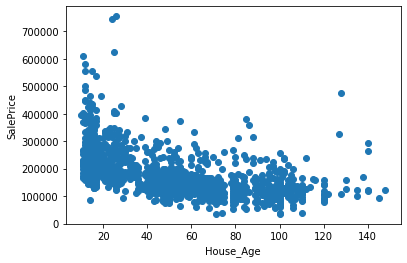

In [31]:
plt.scatter(x = Housing_Data["House_Age"], y = Housing_Data["SalePrice"])
plt.xlabel("House_Age") 
plt.ylabel("SalePrice")
plt.show()

In [32]:
# Getting the Age of the Garage.

Housing_Data["Current_Year"] = datetime.datetime.now().year
Housing_Data["Garage_Age"] = Housing_Data["Current_Year"] - Housing_Data["GarageYrBlt"]
Housing_Data.drop(["Current_Year", "GarageYrBlt"], axis = 1, inplace = True)

In [33]:
# For the House which has no Garage Has age as 2021 after conversion. So we will replace it with -1 because it has no garage.

Housing_Data["Garage_Age"] = Housing_Data["Garage_Age"].replace(2021.0, -1)

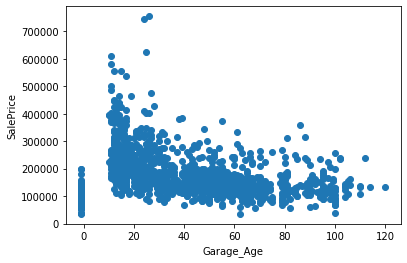

In [34]:
plt.scatter(x = Housing_Data["Garage_Age"], y = Housing_Data["SalePrice"])
plt.xlabel("Garage_Age") 
plt.ylabel("SalePrice")
plt.show()

In [35]:
 # Getting the Remodeled Age of the Houses.

Housing_Data["Current_Year"] = datetime.datetime.now().year
Housing_Data["Remodel_House_Age"] = Housing_Data["Current_Year"] - Housing_Data["YearRemodAdd"]
Housing_Data.drop(["Current_Year", "YearRemodAdd"], axis = 1, inplace = True)

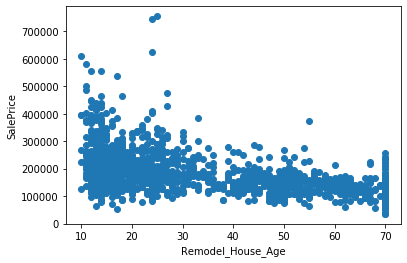

In [36]:
plt.scatter(x = Housing_Data["Remodel_House_Age"], y = Housing_Data["SalePrice"])
plt.xlabel("Remodel_House_Age") 
plt.ylabel("SalePrice")
plt.show()

In [37]:
 # Getting the Year count after the house is sold.
    
Housing_Data["Current_Year"] = datetime.datetime.now().year
Housing_Data["Year_Sold_Count"] = Housing_Data["Current_Year"] - Housing_Data["YrSold"]
Housing_Data.drop(["Current_Year", "YrSold"], axis = 1, inplace = True)

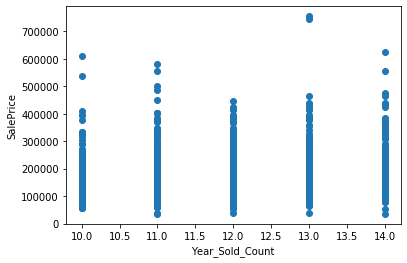

In [38]:
plt.scatter(x = Housing_Data["Year_Sold_Count"], y = Housing_Data["SalePrice"])
plt.xlabel("Year_Sold_Count") 
plt.ylabel("SalePrice")
plt.show()

### 3.4. Drop categorical columns that are highly skewed.

In [39]:
# Check the columns which ara highly skewed by observing the unique value counts in rach column.

for column in Housing_Data:
    print(Housing_Data[column].astype('category').value_counts(normalize = True) * 100)
    print("============================================================================================================")

1460    0.068493
479     0.068493
481     0.068493
482     0.068493
483     0.068493
          ...   
976     0.068493
977     0.068493
978     0.068493
979     0.068493
1       0.068493
Name: Id, Length: 1460, dtype: float64
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
69.0     18.493151
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
75.0      3.630137
65.0      3.013699
85.0      2.739726
78.0      1.712329
21.0      1.575342
90.0      1.575342
68.0      1.301370
64.0      1.301370
24.0      1.301370
73.0      1.232877
63.0      1.164384
79.0      1.164384
72.0      1.164384
55.0    

Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64
2    56.438356
1    25.273973
3    12.397260
0     5.547945
4     0.342466
Name: GarageCars, dtype: float64
0       5.547945
440     3.356164
576     3.219178
240     2.602740
484     2.328767
          ...   
754     0.068493
459     0.068493
458     0.068493
756     0.068493
1418    0.068493
Name: GarageArea, Length: 441, dtype: float64
TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Po            0.205479
Ex            0.205479
Name: GarageQual, dtype: float64
TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64
Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64
0      52.123288
192     2.602740
100     2.465753
144     2.260274
120     2.123288
         ...    
269     0.

In the above analysis, there are many skewed columns in which almost more than 90% of the data points contain the same values. These skewed columns need to be dropped as it will not affect much in our analysis.

In [40]:
# Dropping highly skewed columns.

Housing_Data = Housing_Data.drop(["Street", "Utilities", "Condition2", "RoofMatl", "Heating", "LowQualFinSF", 
                                  "3SsnPorch", "PoolArea", "ScreenPorch", "MiscVal"], axis = 1)

In [41]:
# Also dropping the "Id" column which is not useful for model.

Housing_Data = Housing_Data.drop(["Id"], axis = 1)

In [42]:
# Check the shape of data after dropping highly skewed column.

Housing_Data.shape

(1460, 65)

## Step 4 : Check if the target variable is normally distributed or not.

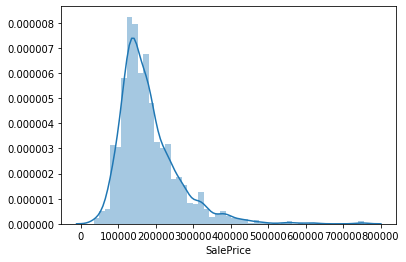

In [43]:
# Plotting a plot to check if target variable is normalized or skewed.

sns.distplot(Housing_Data["SalePrice"])
plt.show()

In [44]:
# The target variable "SalePrice" is skewed towards right so we need to transform it 
# So model can learn on all type of data of price.
# Then we will apply log transformation to obtain a centralized data.

Housing_Data["SalePrice"] = np.log1p(Housing_Data["SalePrice"])

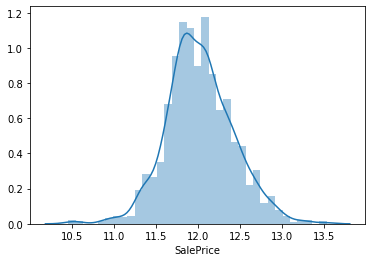

In [45]:
# Check the target variable after applying transformation.

sns.distplot(Housing_Data["SalePrice"])
plt.show()

## Step 5 : Perform EDA to understand the data.

### 5.1. Now for Numerical columns check for outliers.

In [46]:
Out_col = "SalePrice"

Numeric_col = ["MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
               "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", 
               "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", 
               "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "MoSold", "House_Age", "Garage_Age", "Remodel_House_Age", 
               "Year_Sold_Count"]

Categorical_col = ["MSZoning", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "BldgType", 
                   "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", 
                   "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", 
                   "CentralAir", "Electrical", "KitchenQual", "Functional", "GarageType", "GarageFinish", "GarageQual", 
                   "GarageCond", "PavedDrive", "SaleType", "SaleCondition"]

In [47]:
# Function for analysis of outliers in numerical column.

def Outlier_analysis(i, col_i):
    plt.figure(i)
    sns.boxplot(data = Housing_Data[[col_i]])

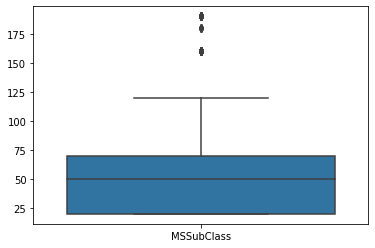

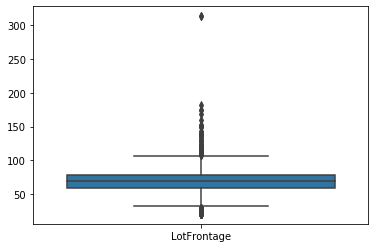

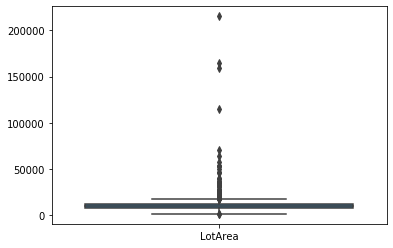

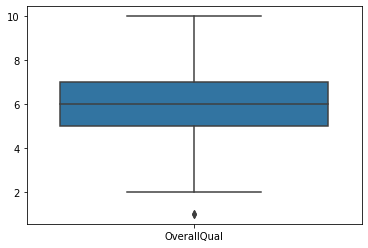

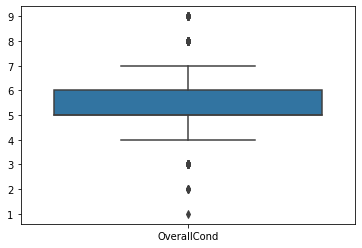

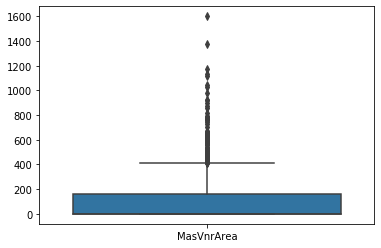

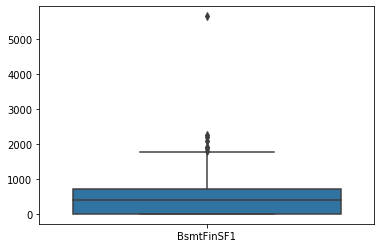

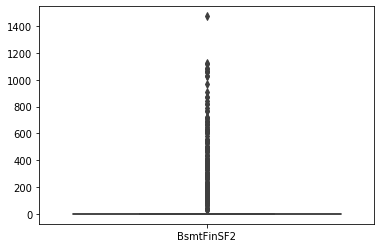

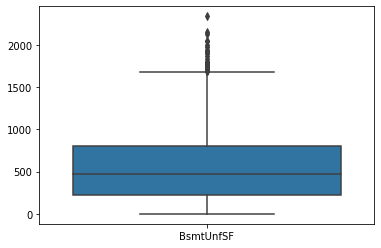

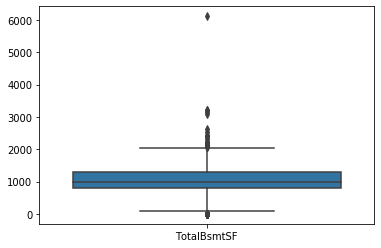

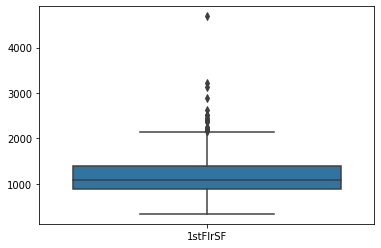

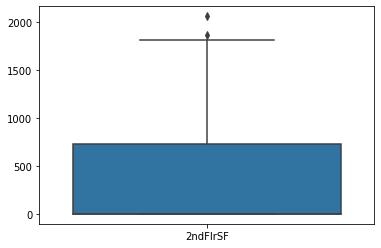

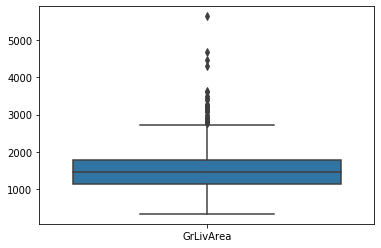

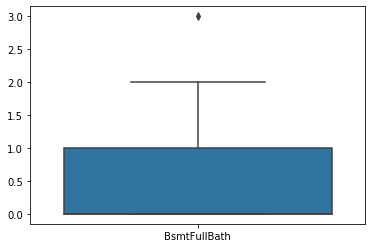

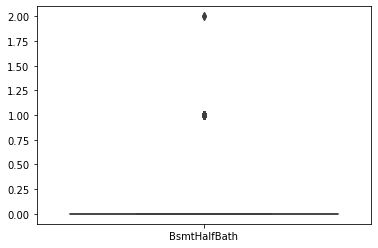

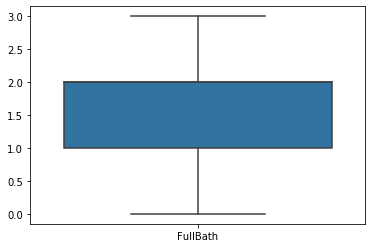

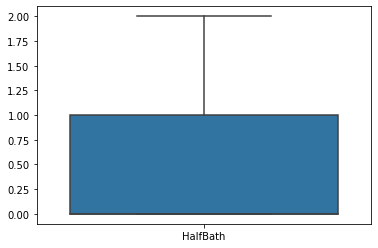

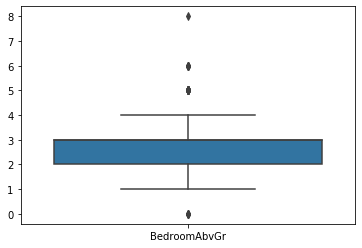

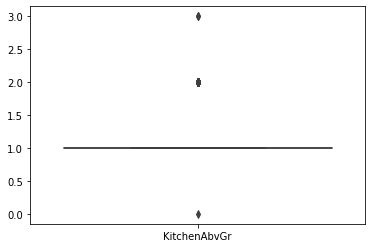

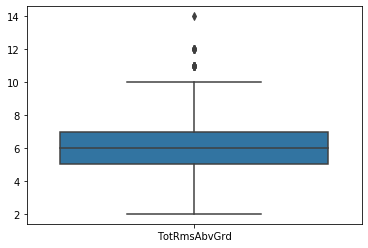

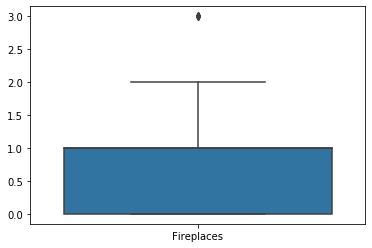

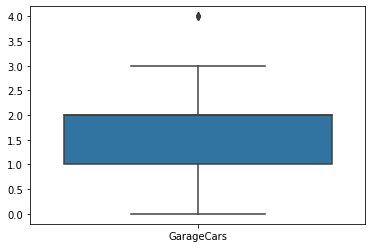

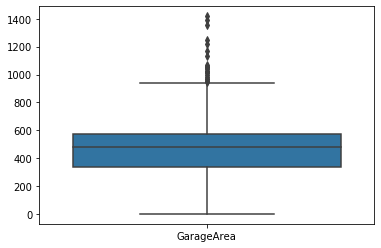

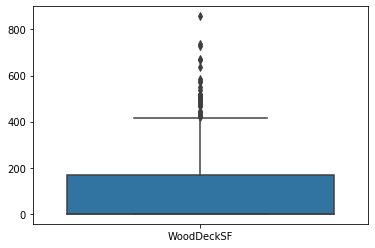

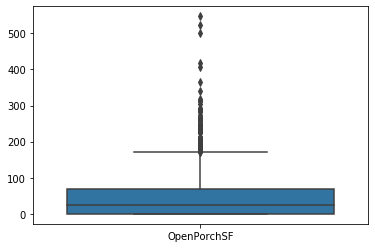

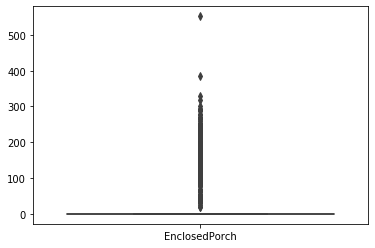

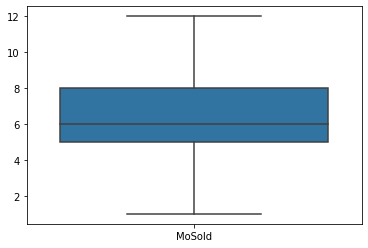

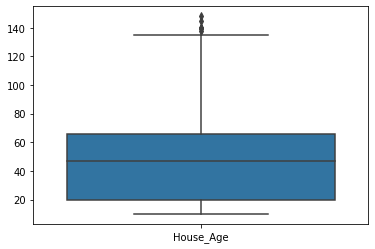

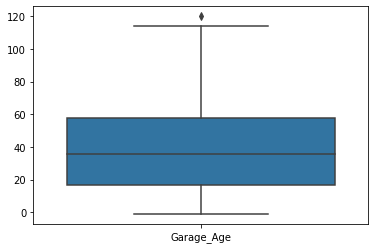

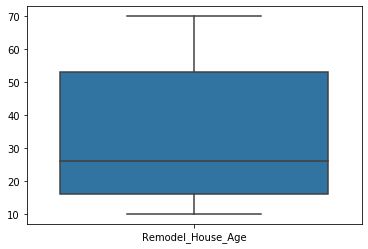

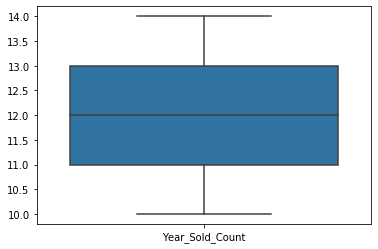

In [48]:
# Numerical column analysis for outliers.

for i, col in enumerate(Numeric_col):
    Outlier_analysis(i, col)

 - There are some outliers in features but Since we transformed our target variable "SalePrice" using log transformation so we will not be treating the outliers for independent features.

### 5.2. Univariate Analysis of Categorical Variables in relation to "SalePrice" column. 

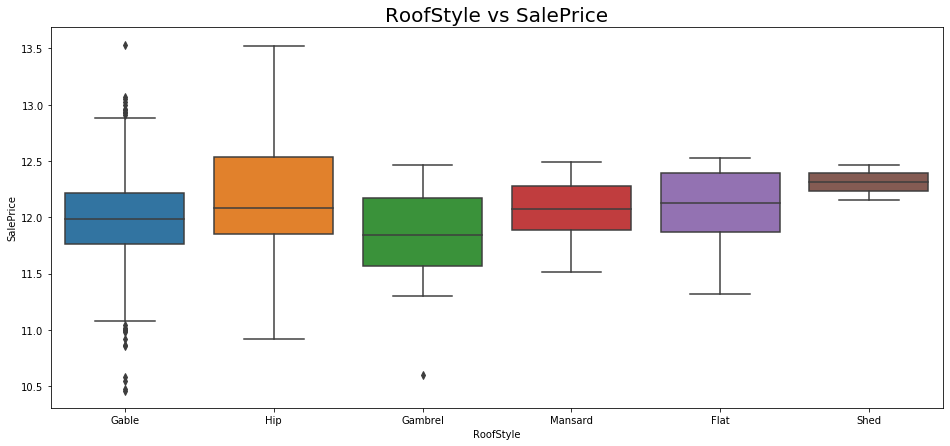

In [49]:
# Bivariate analysis for "RoofStyle vs SalePrice" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "RoofStyle", y = "SalePrice", data = Housing_Data)
plt.xlabel("RoofStyle")
plt.ylabel("SalePrice")
plt.title("RoofStyle vs SalePrice", fontsize = 20)
plt.show()

Observation :
- The sale price of the house for different roofstyles varies. And the house which have roof style as "Hip" has highest sale price.
- For every roof style there are same type of sale price for house is available.

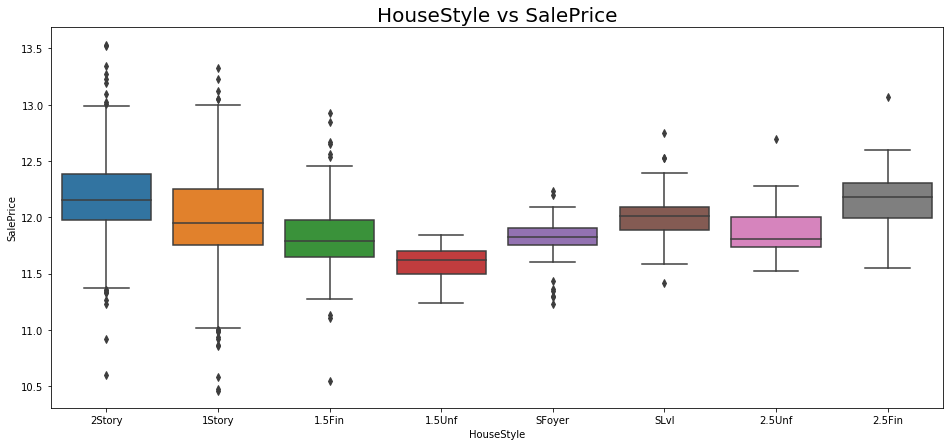

In [50]:
# Bivariate analysis for "HouseStyle vs SalePrice" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "HouseStyle", y = "SalePrice", data = Housing_Data)
plt.xlabel("HouseStyle")
plt.ylabel("SalePrice")
plt.title("HouseStyle vs SalePrice", fontsize = 20)
plt.show()

Observation :
- The sale price for different house styles varies. and the house which has house style as "2Story" has highest sale price.
- The house which have house style as "1.5Unf" has lowest price among all other house styles. 

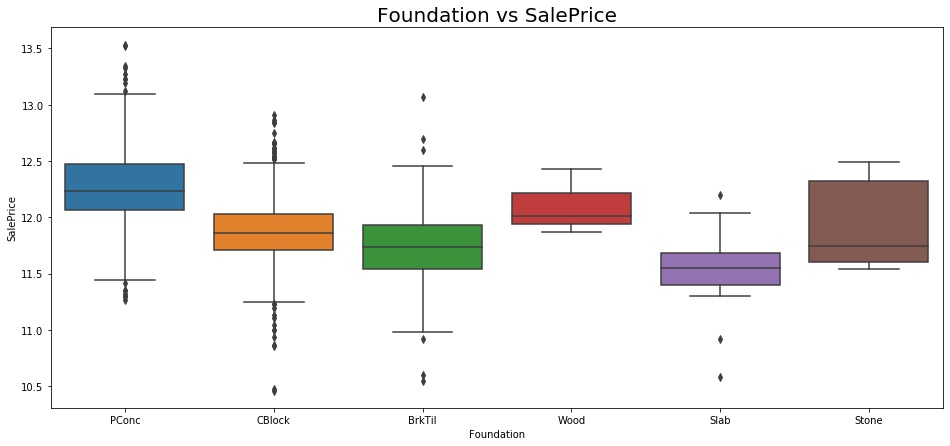

In [51]:
# Bivariate analysis for "Foundation vs SalePrice" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "Foundation", y = "SalePrice", data = Housing_Data)
plt.xlabel("Foundation")
plt.ylabel("SalePrice")
plt.title("Foundation vs SalePrice", fontsize = 20)
plt.show()

Observation :
- The house which have foundation as "PConc" and "Stone" has highest sale price. and the house price for every type of foundation varies.
- The house which have foundation as "Slab" has lowest sale price among all other foundation type.

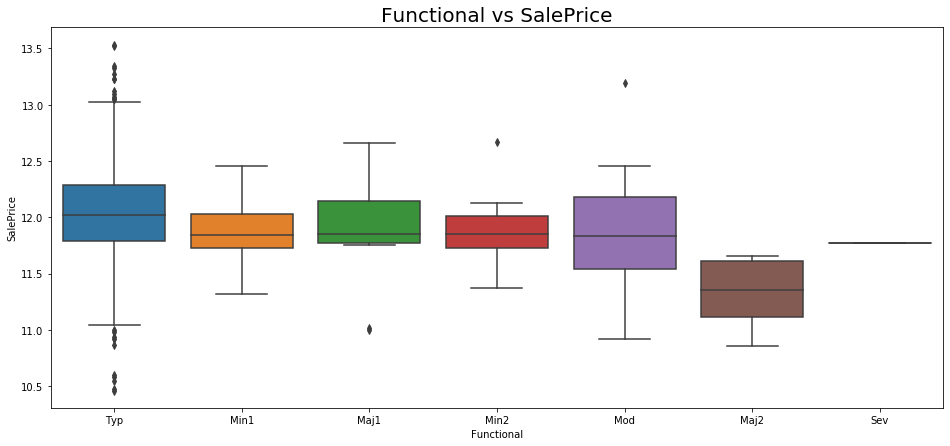

In [52]:
# Bivariate analysis for "Functional vs SalePrice" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "Functional", y = "SalePrice", data = Housing_Data)
plt.xlabel("Functional")
plt.ylabel("SalePrice")
plt.title("Functional vs SalePrice", fontsize = 20)
plt.show()

Observation :
- The house which have home functionality as "Typ" has highest sale price. and the sale price for different functionality of houses varies.
- The house which have home functionality as "Maj2" has lowest sale price among all other functionality of houses.

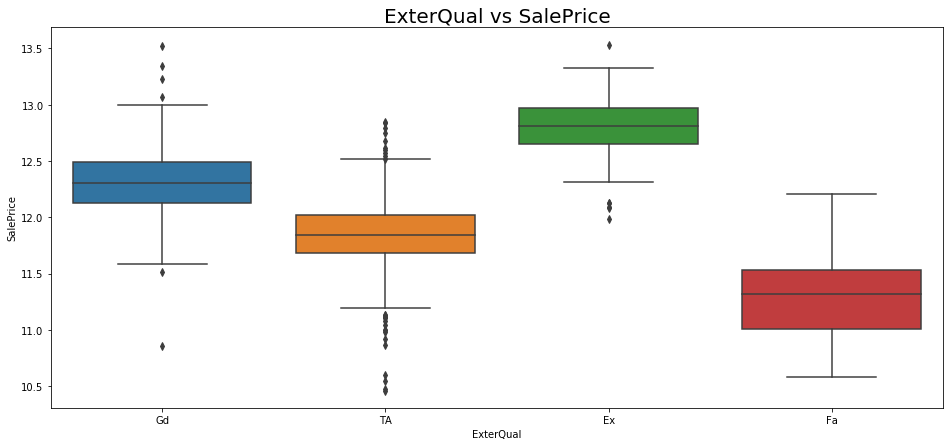

In [53]:
# Bivariate analysis for "Functional vs SalePrice" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "ExterQual", y = "SalePrice", data = Housing_Data)
plt.xlabel("ExterQual")
plt.ylabel("SalePrice")
plt.title("ExterQual vs SalePrice", fontsize = 20)
plt.show()

Observation :
- The house which have quality of the material on the exterior as "Ex" ("Excellent") has highest sale price.
- The house which have quality of the material on the exterior as "Fa" ("Fair") has lowest sale price.
- And the price of houses varies for different exterior style.

### 5.3. Univariate Analysis for Categorical Variables.

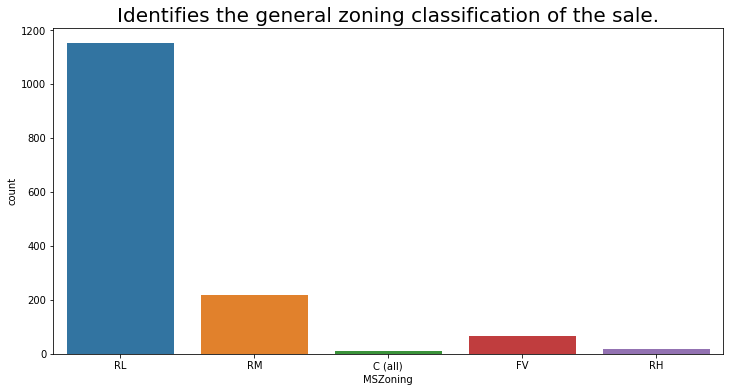

In [54]:
# Univariate analysis for "MSZoning" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["MSZoning"])
plt.title("Identifies the general zoning classification of the sale.", fontsize = 20)
plt.show()

Observation :
- The maximum houses in australia has general zoning classification of the sale as "RL"(Residential Low Density).
- And there are minimum number of houses which has general zoning classification of the sale as "C"(Commercial).

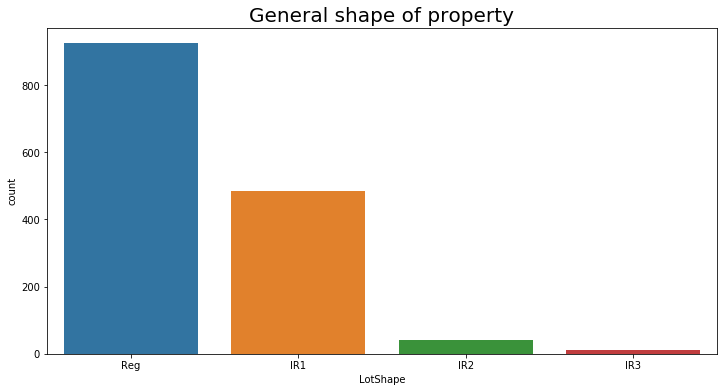

In [55]:
# Univariate analysis for "LotShape" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["LotShape"])
plt.title("General shape of property", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses to sale which has General shape of property as "Reg"(Regular). and there are low number of houses for sale which has general shape of property as "IR3"(Irregular).

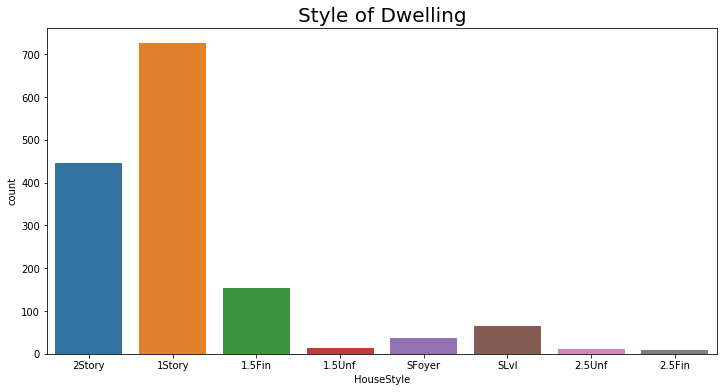

In [56]:
# Univariate analysis for "HouseStyle" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["HouseStyle"])
plt.title("Style of Dwelling", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses to sale which has Style of dwelling as "1Story" followed by "2Story". and there are low number of houses for sale which has Style of dwelling as "1.5Unf" followed by "2.5Unf" and "2.5Fin".

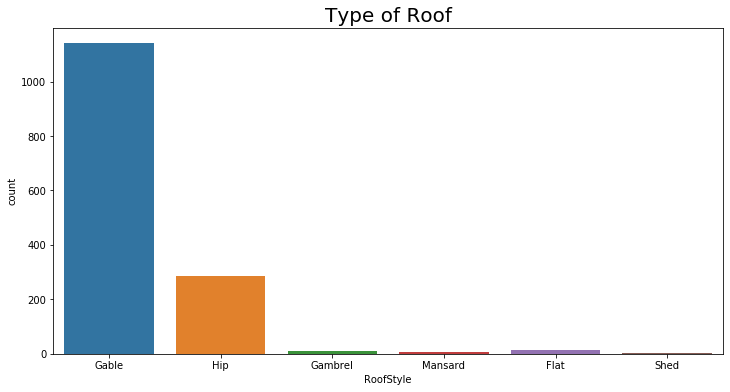

In [57]:
# Univariate analysis for "RoofStyle" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["RoofStyle"])
plt.title("Type of Roof", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses to sale which has type of roof as "Gable" followed by "Hip". and there are low number of houses for sale which has type of roof as "Gambrel" followed by "Flat", "Mansard" and "Shed".

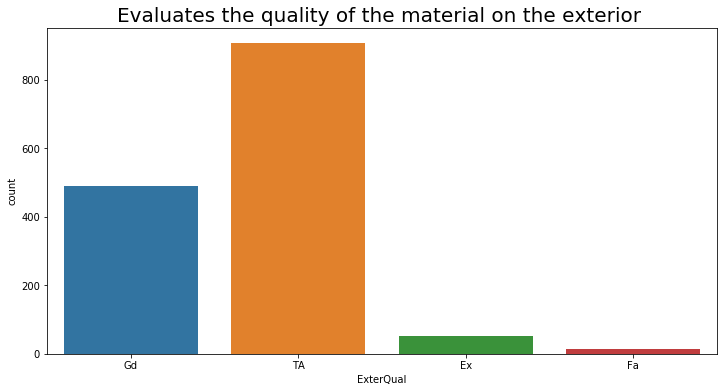

In [58]:
# Univariate analysis for "ExterQual" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["ExterQual"])
plt.title("Evaluates the quality of the material on the exterior ", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses to sale which has the quality of the material on the exterior as "TA"(Average) followed by "Gd"(Good). 
- There are low number of houses for sale which has the quality of the material on the exterior as "Ex"(Excellent) followed by "Fa"(Fair).

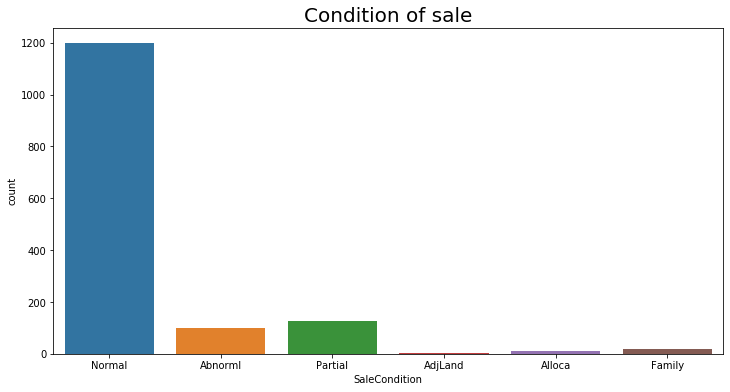

In [59]:
# Univariate analysis for "SaleCondition" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["SaleCondition"])
plt.title("Condition of sale", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses to sale which has Condition of Sale as "Normal" followed by "Partial". and there are low number of houses for sale which has Condition of Sale as "Abnorml" followed by "Family", "Alloca" and "AdjLand".

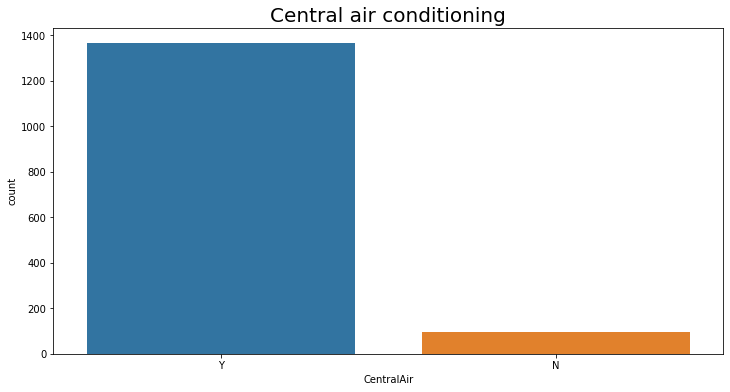

In [60]:
# Univariate analysis for "CentralAir" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["CentralAir"])
plt.title("Central air conditioning", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses to sale which have Central air conditioning. and there are low number of houses for sale which don't have Cental air conditioning. 

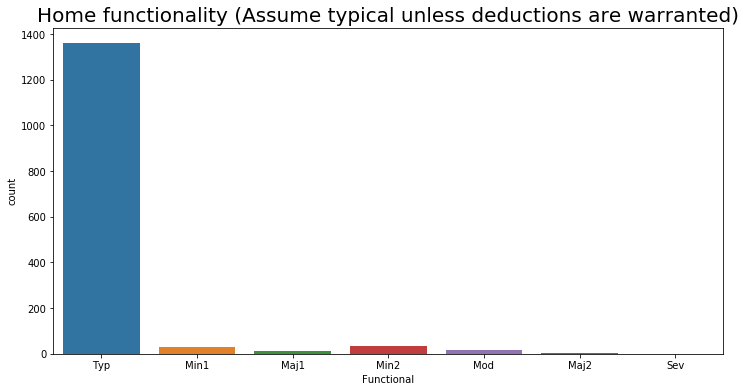

In [61]:
# Univariate analysis for "Functional" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["Functional"])
plt.title("Home functionality (Assume typical unless deductions are warranted)", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses for sale which has Home functionality as "Typical Functionlity. and there are low number of houses for sale which has home functionality as "Min2" followed by "Min1", "Maj1", "Mod", "Maj2" and "Sev".

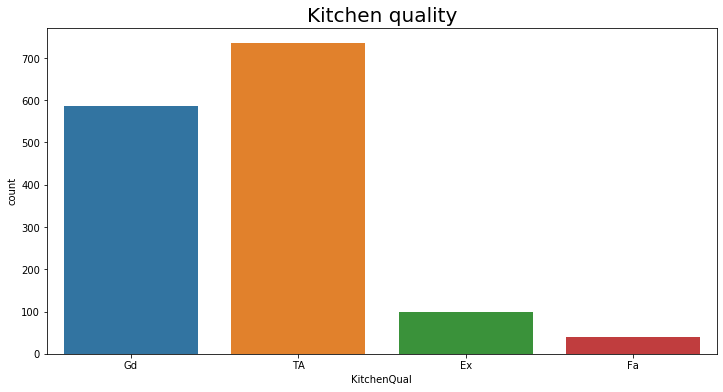

In [62]:
# Univariate analysis for "KitchenQual" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["KitchenQual"])
plt.title("Kitchen quality", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses for sale which has Kitchen Quality as "TA" followed by "Gd". and there are low number of houses for sale which has Kitchen Quality as "Ex" followed by "Fa".

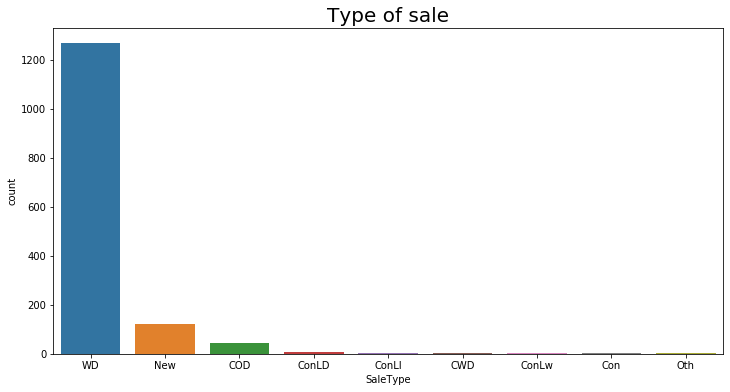

In [63]:
# Univariate analysis for "SaleType" column.

plt.figure(figsize = (12, 6))
sns.countplot(Housing_Data["SaleType"])
plt.title("Type of sale", fontsize = 20)
plt.show()

Observation :
- The australia has maximum number of houses for sale which has type of sale as "WD". and there are low number of houses for sale for other category.

### 5.4. Univariate analysis for Numerical Variables.

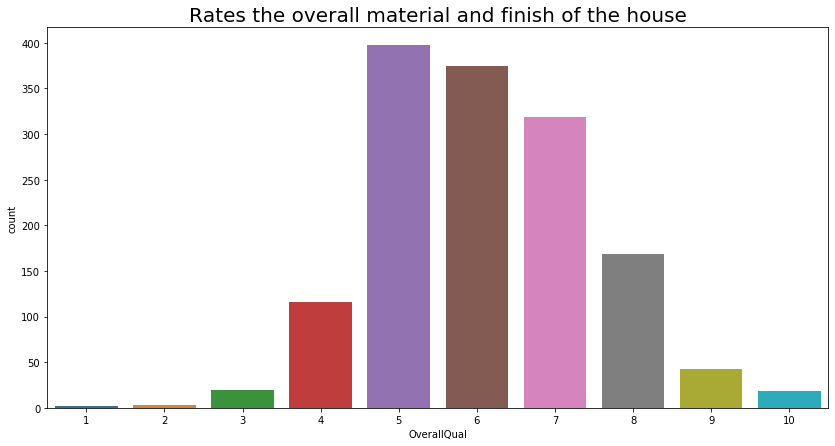

In [64]:
# Univariate analysis for "OverallQual" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["OverallQual"])
plt.title("Rates the overall material and finish of the house", fontsize = 20)
plt.show()

Observation :
- Most of the houses has the overall quality ranges between 5 to 7 which are available for sale.
- The Quality of most of the houses are in between  Average to Good which are available for sale.

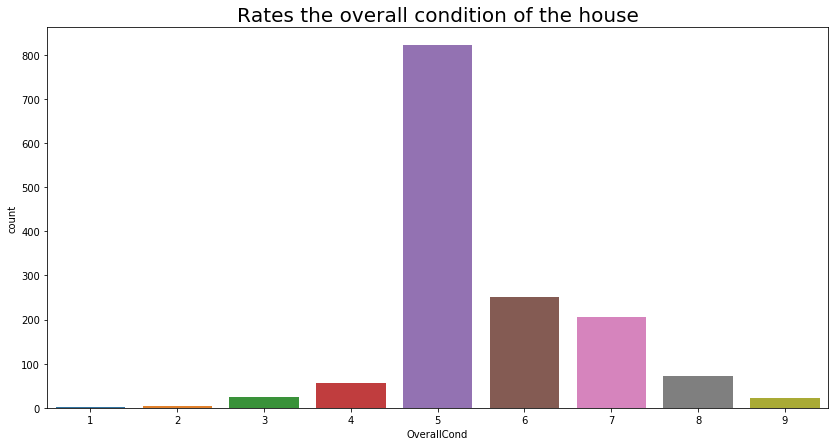

In [65]:
# Univariate analysis for "OverallCond" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["OverallCond"])
plt.title("Rates the overall condition of the house", fontsize = 20)
plt.show()

Onservation :
- Most of the houses has the overall condition is 5(Average) which are available for sale.

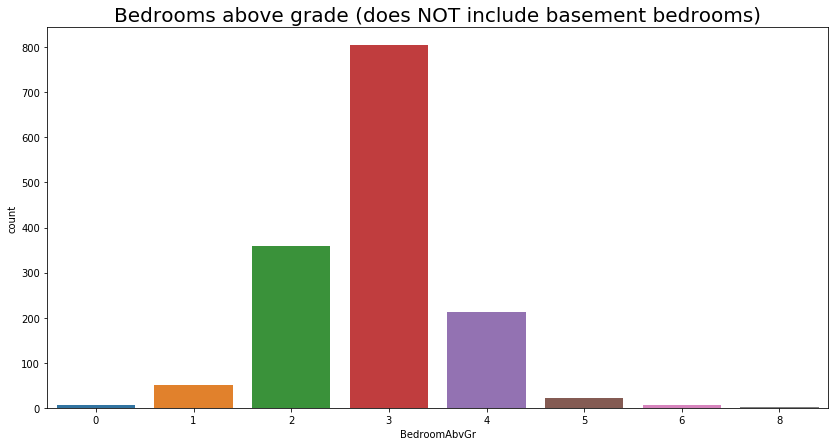

In [66]:
# Univariate analysis for "BedroomAbvGr" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["BedroomAbvGr"])
plt.title("Bedrooms above grade (does NOT include basement bedrooms)", fontsize = 20)
plt.show()

Observation :
- Most of the houses has main bedroom condition 3 ie."Fair" which are available for sale.
- There are very smal number of houses which has bedroom condition good and excellent.

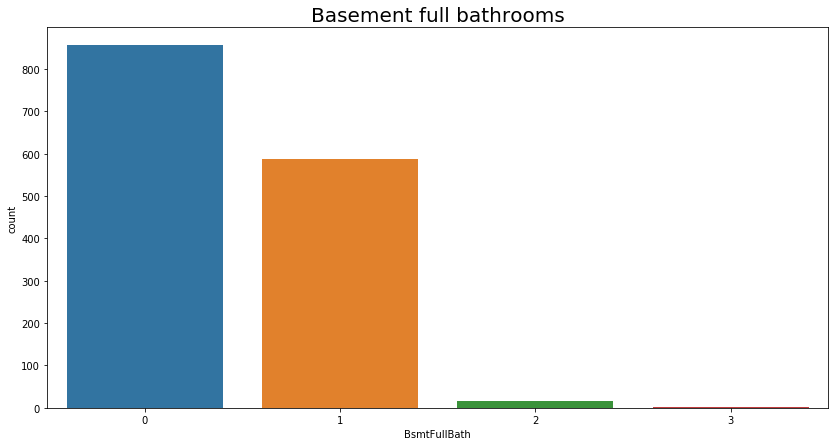

In [67]:
# Univariate analysis for "BsmtFullBath" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["BsmtFullBath"])
plt.title("Basement full bathrooms", fontsize = 20)
plt.show()

Observation :
- Most of the houses has 0 or 1 basement full bathrooms which are available for sale.
- And the houses which have more than 1 basement full bathrooms are very low.

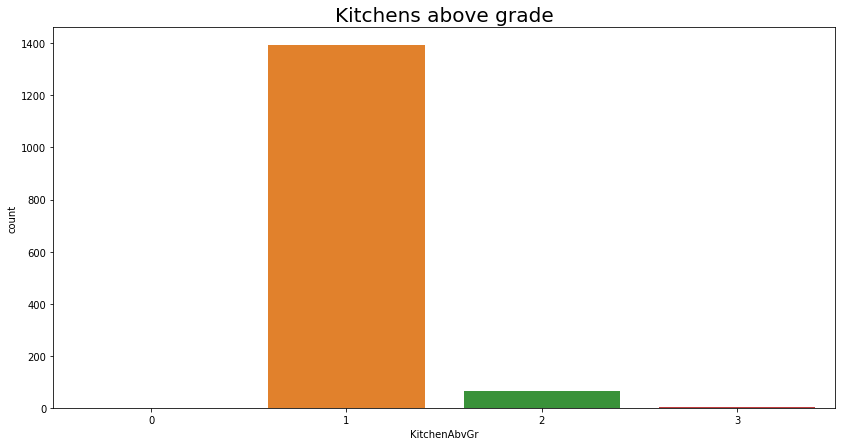

In [68]:
# Univariate analysis for "KitchenAbvGr" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["KitchenAbvGr"])
plt.title("Kitchens above grade", fontsize = 20)
plt.show()

Observation :
- Most of the houses in dataset has 1 kithchen above grade. and very few houses have 2 or 3 kitchen above grade.

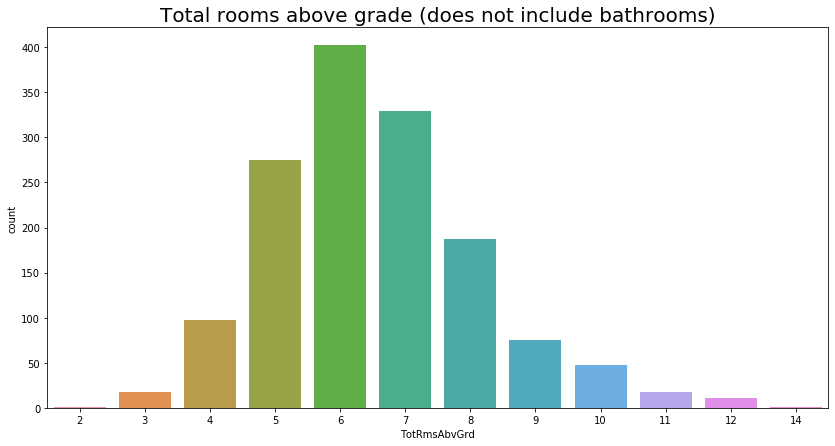

In [69]:
# Univariate analysis for "TotRmsAbvGrd" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["TotRmsAbvGrd"])
plt.title("Total rooms above grade (does not include bathrooms)", fontsize = 20)
plt.show()

Observation :
- The most of the houses which are available for sale has 5, 6, 7 total rooms above grade.

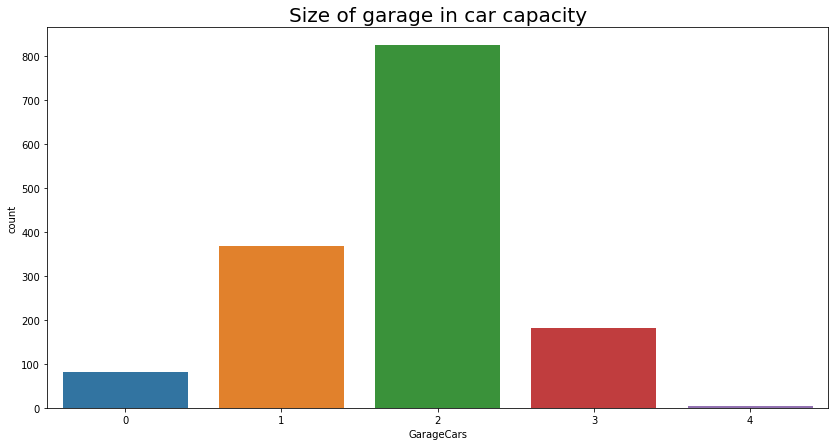

In [70]:
# Univariate analysis for "GarageCars" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["GarageCars"])
plt.title("Size of garage in car capacity", fontsize = 20)

plt.show()

Observation :
- The houses which are avilable for sale most of them have car capacity in garage is 2. which is might be the useful for impacting on the sale price feature.

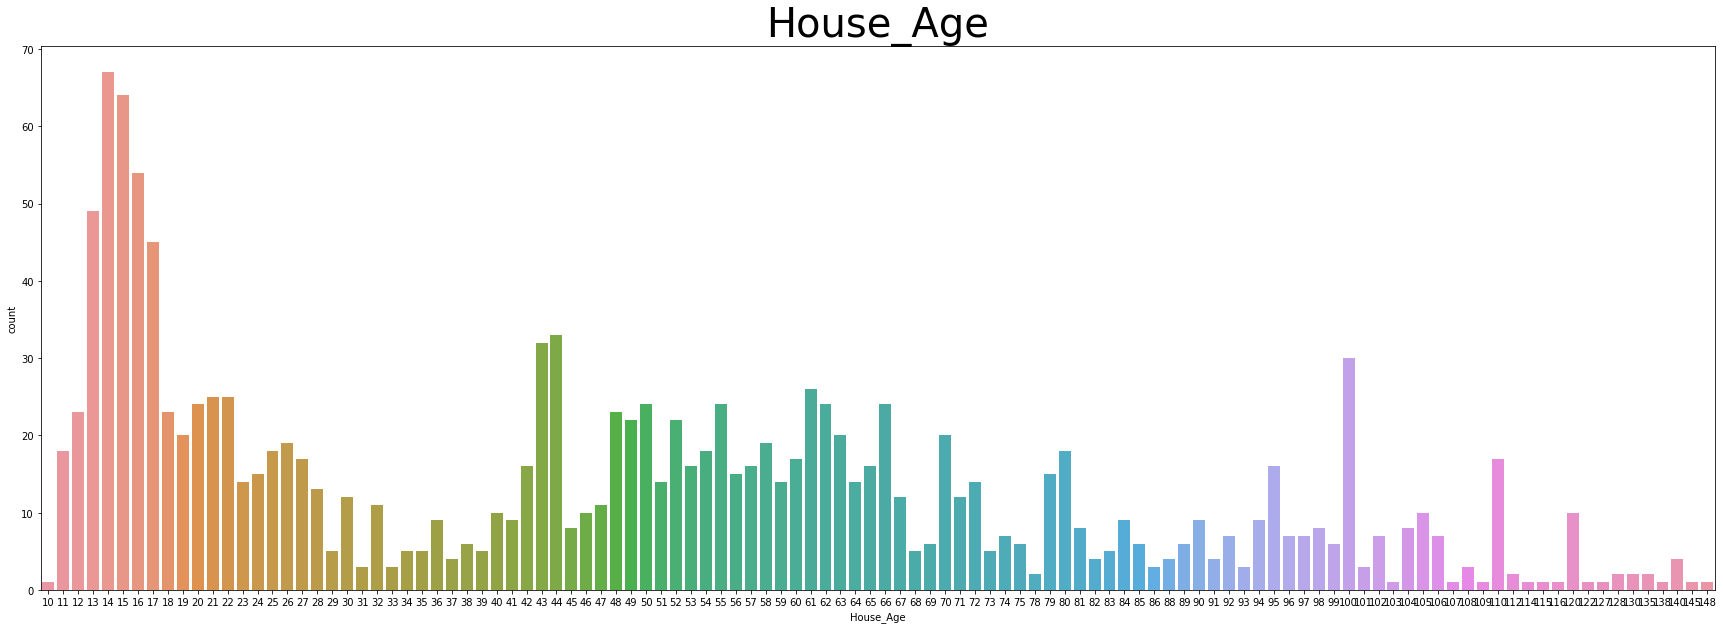

In [71]:
# Univariate analysis for "House_Age" continous variable.

plt.figure(figsize = (30, 10))
sns.countplot(Housing_Data["House_Age"])
plt.title("House_Age", fontsize = 40)
plt.show()

Observation :
- Most of houses in australia which are available for sale has age between 13 to 17.
- There are very few houses which are old.

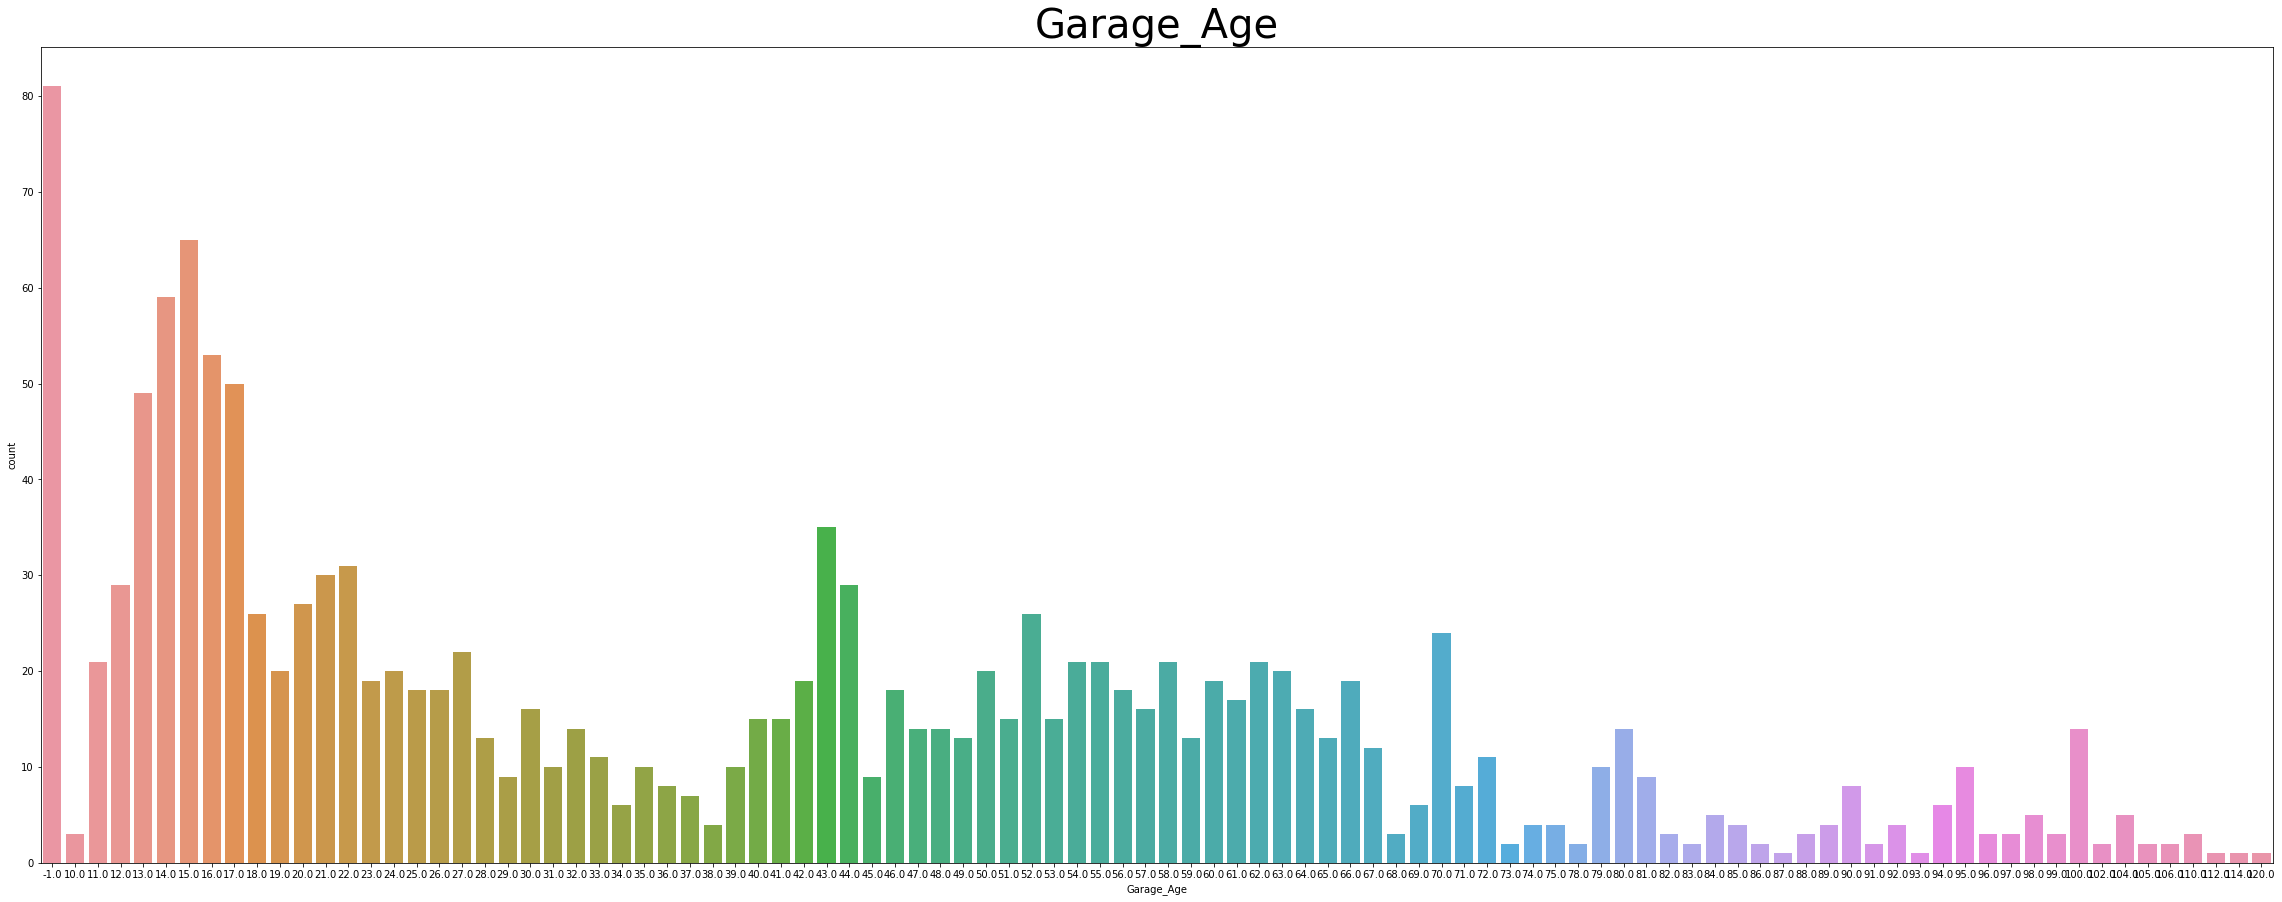

In [72]:
# Univariate analysis for "Garage_Age" continous variable.

plt.figure(figsize = (40, 15))
sns.countplot(Housing_Data["Garage_Age"])
plt.title("Garage_Age", fontsize = 40)
plt.show()

Observation :
- Most of houses in australia which are available for sale has garage age between 11 to 22.
- There are very few garage which are old.
- Means there are higher chances that the condition of them are good or average.

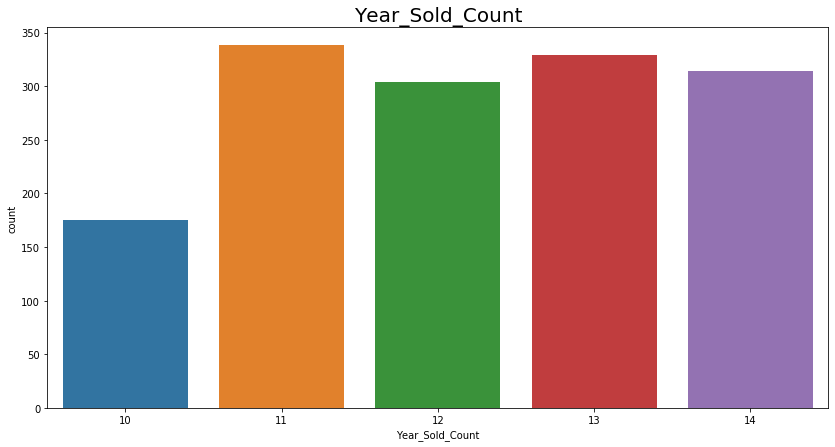

In [73]:
# Univariate analysis for "House_Age" continous variable.

plt.figure(figsize = (14, 7))
sns.countplot(Housing_Data["Year_Sold_Count"])
plt.title("Year_Sold_Count", fontsize = 20)
plt.show()

Observation :
- Most of the year has sold count between 11 to 14. 

### 5.5. Bivariate Analysis for Continous - Categorical Variables.

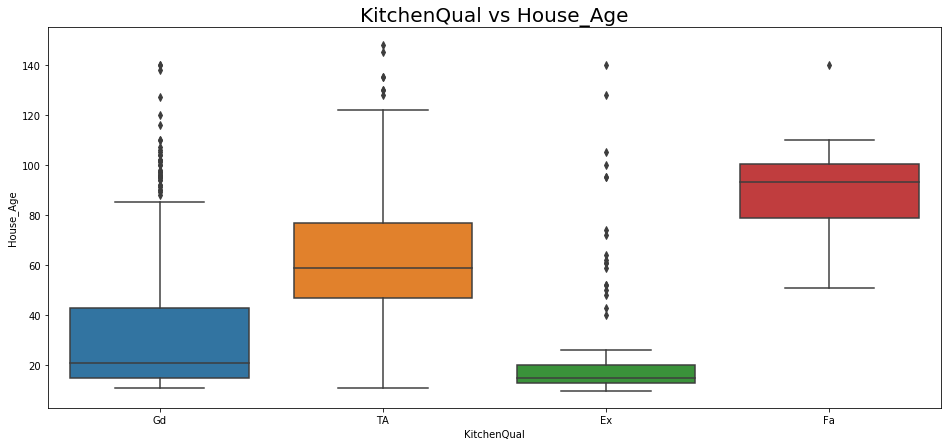

In [74]:
# Bivariate analysis for "KitchenQual vs House_Age" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "KitchenQual", y = "House_Age", data = Housing_Data)
plt.xlabel("KitchenQual")
plt.ylabel("House_Age")
plt.title("KitchenQual vs House_Age", fontsize = 20)
plt.show()

Observation :
- The houses which have kitchen Quality as Good and Excellent has age between 20 to 40.
- The houses which are very old ie. it has more age has kitchen quality "Fair".

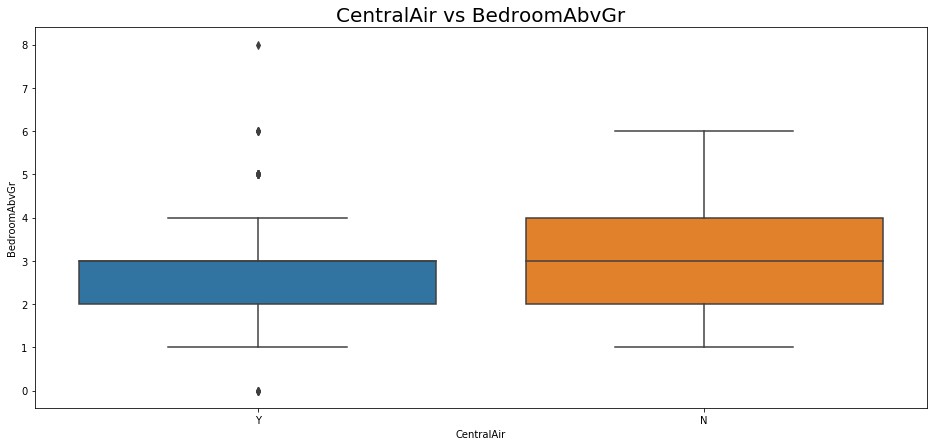

In [75]:
# Bivariate analysis for "CentralAir vs BedroomAbvGr" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "CentralAir", y = "BedroomAbvGr", data = Housing_Data)
plt.xlabel("CentralAir")
plt.ylabel("BedroomAbvGr")
plt.title("CentralAir vs BedroomAbvGr", fontsize = 20)
plt.show()

Observation :
- Most of the houses which dont have central air has bedroom above grade.
- There are also some houses which have central air and bedroom above grade.

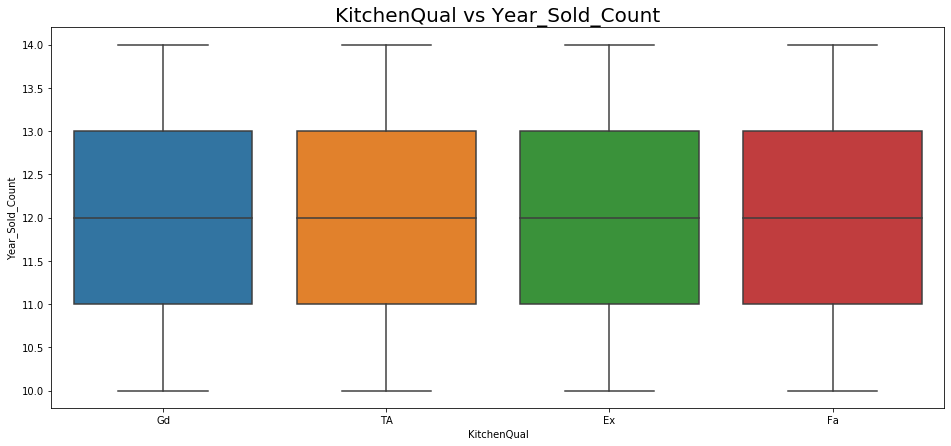

In [76]:
# Bivariate analysis for "KitchenQual vs Year_Sold_Count" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "KitchenQual", y = "Year_Sold_Count", data = Housing_Data)
plt.xlabel("KitchenQual")
plt.ylabel("Year_Sold_Count")
plt.title("KitchenQual vs Year_Sold_Count", fontsize = 20)
plt.show()

Observation : 
- For every type of kitchen quality the year sold count is approximately equal.

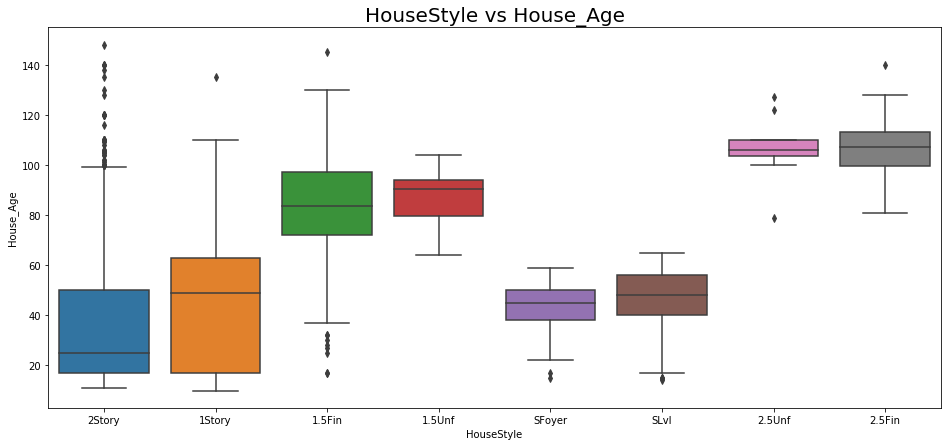

In [77]:
# Bivariate analysis for "HouseStyle vs House_Age" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "HouseStyle", y = "House_Age", data = Housing_Data)
plt.xlabel("HouseStyle")
plt.ylabel("House_Age")
plt.title("HouseStyle vs House_Age", fontsize = 20)
plt.show()

Observation :
- The houses which have house style as 2Story and 1Story has less age between 20 to 40 ie. there might be the chances that this houses have good condition.
- The houses which have house style as 1.5Fin and 1.5Unf has age between 70 to 100 ie. there might be the chances that this houses have average or fair condition.
- The houses which have house style as SFoyer and SLvl has age between 40 to 60 ie. there might be the chances that this houses have average or good condition.
- The houses which have house style as 2.5Unf and 2.4Fin has age between 100 to 120 ie. there might be the chances that this houses have fair condition.

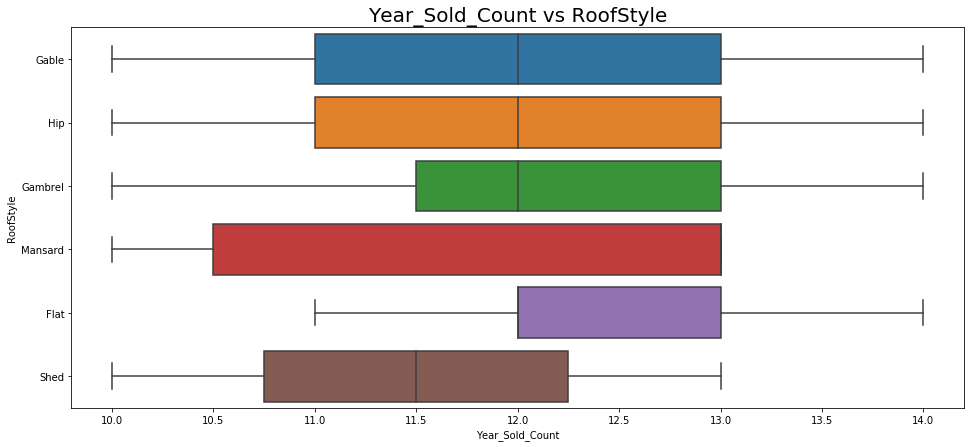

In [78]:
# Bivariate analysis for "Year_Sold_Count vs RoofStyle" variables.

plt.figure(figsize = (16, 7))
sns.boxplot(x = "Year_Sold_Count", y = "RoofStyle", data = Housing_Data)
plt.xlabel("Year_Sold_Count")
plt.ylabel("RoofStyle")
plt.title("Year_Sold_Count vs RoofStyle", fontsize = 20)
plt.show()

Observation :
- The houses which have roof style Gablr and Hip has year sold count between 11 to 13.
- The houses which have roof style Mansard has year sold count between 10 to 13.

### 5.6. Bivariate Analysis for Categorical - Categorical variables.

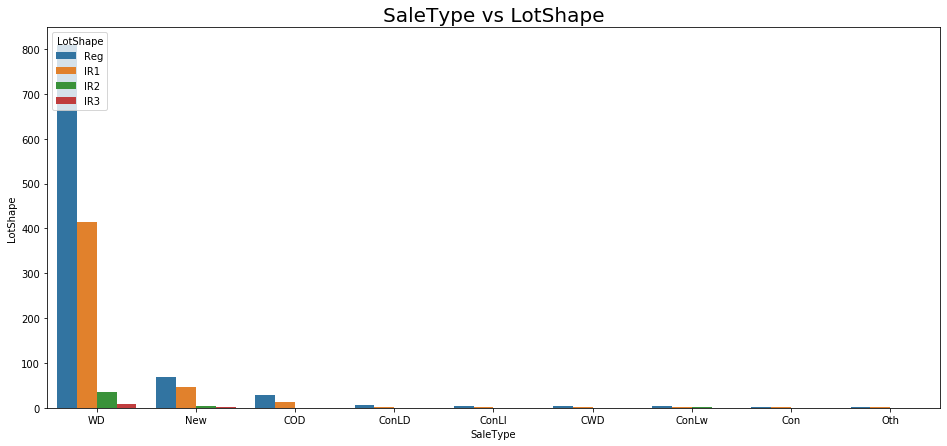

In [79]:
# Bivariate analysis for "SaleType vs LotShape" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "SaleType", hue = "LotShape", data = Housing_Data)
plt.xlabel("SaleType")
plt.ylabel("LotShape")
plt.xticks(rotation = 0)
plt.title("SaleType vs LotShape", fontsize = 20)
plt.show()

Observation :
- Most of the houses which are available for sale have Sale type as WD and shape of property "REG" followed by "IR1".

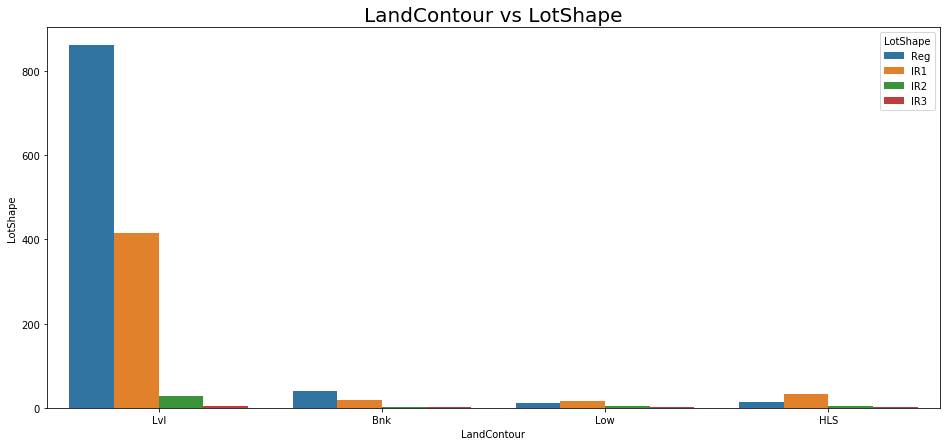

In [80]:
# Bivariate analysis for "LandContour vs LotShape" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "LandContour", hue = "LotShape", data = Housing_Data)
plt.xlabel("LandContour")
plt.ylabel("LotShape")
plt.xticks(rotation = 0)
plt.title("LandContour vs LotShape", fontsize = 20)
plt.show()

Observation :
- Most of the houses available for sale has flatnessof property as "Lvl"(Near Flat) and shaoe of property as "Reg" followed by "IR1".

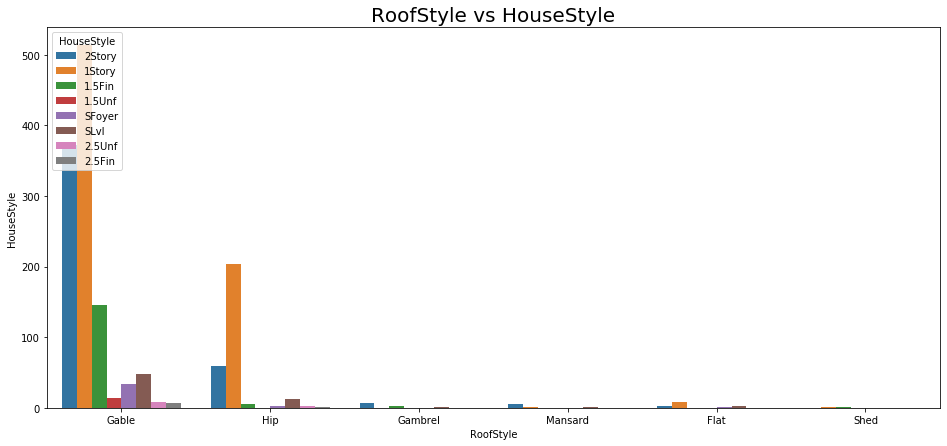

In [81]:
# Bivariate analysis for "RoofStyle vs HouseStyle" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "RoofStyle", hue = "HouseStyle", data = Housing_Data)
plt.xlabel("RoofStyle")
plt.ylabel("HouseStyle")
plt.xticks(rotation = 0)
plt.title("RoofStyle vs HouseStyle", fontsize = 20)
plt.show()

Observation :
- Most of the houses which are available for sale has roof style as Gable and House style as 1Story followed by 2Story.

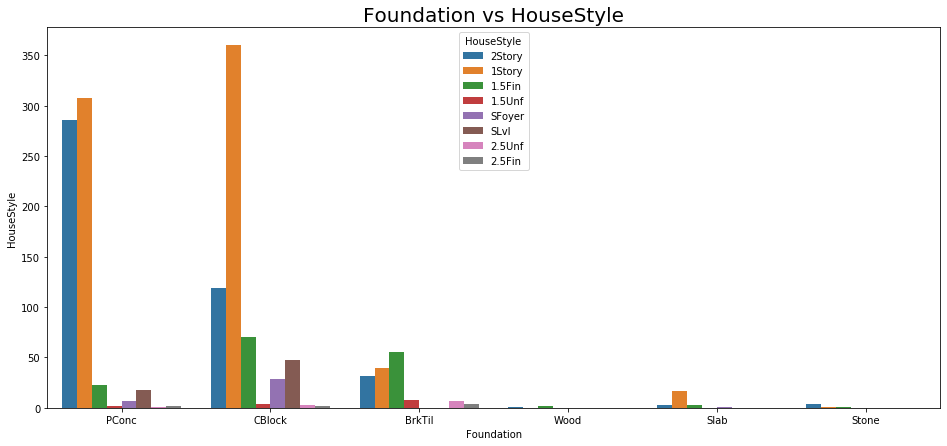

In [82]:
# Bivariate analysis for "Foundation vs HouseStyle" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "Foundation", hue = "HouseStyle", data = Housing_Data)
plt.xlabel("Foundation")
plt.ylabel("HouseStyle")
plt.xticks(rotation = 0)
plt.title("Foundation vs HouseStyle", fontsize = 20)
plt.show()

Observation :
- Most of the houses which are available for sale has foundation as PConc and CBlock and House style as 1Story followed by 2Story.

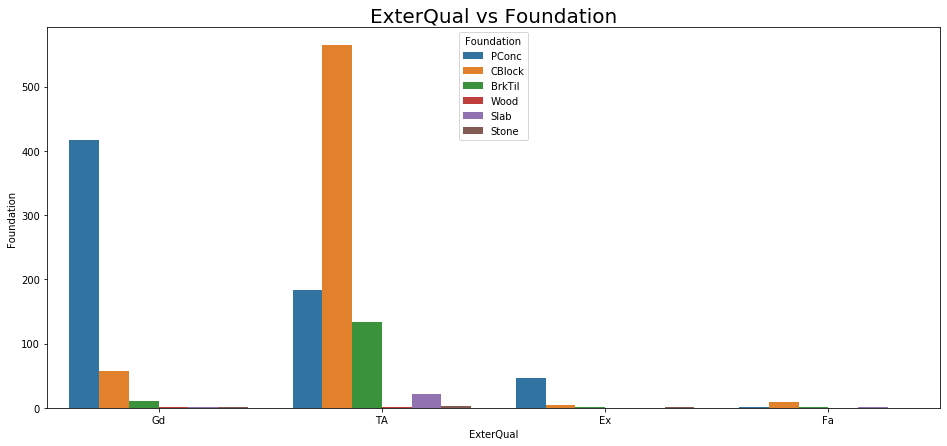

In [83]:
# Bivariate analysis for "ExterQual vs Foundation" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "ExterQual", hue = "Foundation", data = Housing_Data)
plt.xlabel("ExterQual")
plt.ylabel("Foundation")
plt.xticks(rotation = 0)
plt.title("ExterQual vs Foundation", fontsize = 20)
plt.show()

Observation :
- Most of the houses has External Quality as "GD" and "TA" where this houses has foundation as PConc and CBlock. 

### 5.7. Checking the correlation of features.

In [84]:
# Correlation Matrix

cor = Housing_Data.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,House_Age,Garage_Age,Remodel_House_Age,Year_Sold_Count
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.013585,-0.073959,-0.027850,-0.106388,-0.040581,0.021407
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.010451,0.335292,-0.116685,-0.023601,-0.083348,-0.006380
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.001205,0.257320,-0.014228,0.050809,-0.013788,0.014261
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.070815,0.817185,-0.572323,-0.381595,-0.550684,0.027347
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.003511,-0.036868,0.375983,0.287367,-0.073741,-0.043950
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,-0.006723,0.426776,-0.311600,-0.183093,-0.176529,0.008317
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,-0.015727,0.372023,-0.249503,-0.098714,-0.128451,-0.014359
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.015211,0.004832,0.049107,0.095672,0.067759,-0.031706
BsmtUnfSF,-0.140759,0.124098,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.034888,0.221985,-0.149040,-0.160083,-0.181133,0.041258
TotalBsmtSF,-0.238518,0.363472,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.013196,0.612134,-0.391452,-0.228684,-0.291066,0.014969


## Step 6 : Data Prepration - II

### Step 6.1. Treat some ordinal features in dataset.

In [85]:
# Check the columns which ara highly ordinal by observing the unique value counts in each column.

for column in Housing_Data:
    print(Housing_Data[column].astype('category').value_counts(normalize = True) * 100)
    print("============================================================================================================")

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
69.0     18.493151
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
75.0      3.630137
65.0      3.013699
85.0      2.739726
78.0      1.712329
21.0      1.575342
90.0      1.575342
68.0      1.301370
64.0      1.301370
24.0      1.301370
73.0      1.232877
63.0      1.164384
79.0      1.164384
72.0      1.164384
55.0      1.164384
100.0     1.095890
74.0      1.027397
51.0      1.027397
66.0      1.027397
52.0      0.958904
59.0      0.890411
82.0      0.821918
71.0      0.821918
67.0      0.821918
40.0      0.821918
43.0      0.821918
57.0  

0      52.123288
192     2.602740
100     2.465753
144     2.260274
120     2.123288
         ...    
269     0.068493
265     0.068493
263     0.068493
260     0.068493
215     0.068493
Name: WoodDeckSF, Length: 274, dtype: float64
0      44.931507
36      1.986301
48      1.506849
20      1.438356
40      1.301370
         ...    
159     0.068493
156     0.068493
148     0.068493
142     0.068493
119     0.068493
Name: OpenPorchSF, Length: 202, dtype: float64
0      85.753425
112     1.027397
96      0.410959
120     0.342466
144     0.342466
192     0.342466
216     0.342466
252     0.273973
116     0.273973
156     0.273973
126     0.205479
228     0.205479
128     0.205479
184     0.205479
102     0.205479
150     0.205479
40      0.205479
176     0.205479
164     0.205479
77      0.136986
185     0.136986
80      0.136986
180     0.136986
84      0.136986
160     0.136986
168     0.136986
205     0.136986
158     0.136986
154     0.136986
100     0.136986
108     0.136986
137   

In [86]:
# Get the columns which have ordinal values.

Housing_Data[["LandSlope", "ExterQual", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
              "CentralAir", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond", "ExterCond", "LotShape"]].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [87]:
# Map the ordinal column values to its numeric form.

Housing_Data["LandSlope"] = Housing_Data.LandSlope.map({"Gtl" : 0, "Mod" : 1, "Sev" : 2})
Housing_Data["ExterQual"] = Housing_Data.ExterQual.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Housing_Data["BsmtQual"] = Housing_Data.BsmtQual.map({"No Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Housing_Data["BsmtCond"] = Housing_Data.BsmtCond.map({"No Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Housing_Data["BsmtExposure"] = Housing_Data.BsmtExposure.map({"No Basement" : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4})
Housing_Data["BsmtFinType1"] = Housing_Data.BsmtFinType1.map({"No Basement" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6})
Housing_Data["BsmtFinType2"] = Housing_Data.BsmtFinType2.map({"No Basement" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6})
Housing_Data["HeatingQC"] = Housing_Data.HeatingQC.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Housing_Data["CentralAir"] = Housing_Data.CentralAir.map({"N" : 0, "Y" : 1})
Housing_Data["KitchenQual"] = Housing_Data.KitchenQual.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Housing_Data["GarageFinish"] = Housing_Data.GarageFinish.map({"No Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3})
Housing_Data["GarageQual"] = Housing_Data.GarageQual.map({"No Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Housing_Data["GarageCond"] = Housing_Data.GarageCond.map({"No Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
Housing_Data["ExterCond"] = Housing_Data.ExterCond.map({"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
Housing_Data["LotShape"] = Housing_Data.LotShape.map({"IR1" : 0, "IR2" : 1, "IR3" : 2, "Reg" : 3})

In [88]:
# Check the columns after ordinal features conversion.

Housing_Data[["LandSlope", "ExterQual", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
              "CentralAir", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond", "ExterCond", "LotShape"]].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [89]:
# Check the top 5 records from the dataset after conversion.

Housing_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,House_Age,Garage_Age,Remodel_House_Age,Year_Sold_Count
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,4,1,SBrkr,856,854,1710,1,0,2,1,3,1,3,8,Typ,0,Attchd,2,2,548,3,3,Y,0,61,0,2,WD,Normal,12.247699,17,17.0,17,12
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,4,1,SBrkr,1262,0,1262,0,1,2,0,3,1,2,6,Typ,1,Attchd,2,2,460,3,3,Y,298,0,0,5,WD,Normal,12.109016,44,44.0,44,13
2,60,RL,68.0,11250,0,Lvl,Inside,0,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,4,1,SBrkr,920,866,1786,1,0,2,1,3,1,3,6,Typ,1,Attchd,2,2,608,3,3,Y,0,42,0,9,WD,Normal,12.317171,19,19.0,18,12
3,70,RL,60.0,9550,0,Lvl,Corner,0,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,3,1,SBrkr,961,756,1717,1,0,1,0,3,1,3,7,Typ,1,Detchd,1,3,642,3,3,Y,0,35,272,2,WD,Abnorml,11.849405,105,22.0,50,14
4,60,RL,84.0,14260,0,Lvl,FR2,0,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,4,1,SBrkr,1145,1053,2198,1,0,2,1,4,1,3,9,Typ,1,Attchd,2,3,836,3,3,Y,192,84,0,12,WD,Normal,12.429220,20,20.0,20,12


### Step 6.2. Create dummies for categorical data.

In [90]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

Dummy_Columns = pd.get_dummies(Housing_Data[["MSZoning", "LandContour", "LotConfig", "Neighborhood", "Condition1", "BldgType",
                                             "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType",
                                             "Foundation", "Electrical", "Functional", "GarageType", "PavedDrive",
                                             "SaleType", "SaleCondition"]], drop_first = True)

In [91]:
# Adding the result into main dataframe.

Housing_Data = pd.concat([Housing_Data, Dummy_Columns], axis = 1)

In [92]:
# Dropping the repeated variables.

Housing_Data = Housing_Data.drop(["MSZoning", "LandContour", "LotConfig", "Neighborhood", "Condition1", "BldgType", 
                                  "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", 
                                  "Electrical", "Functional", "GarageType", "PavedDrive", "SaleType", 
                                  "SaleCondition"], axis = 1)

In [93]:
# Check the top 5 records from dataset after conversion.

Housing_Data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,House_Age,Garage_Age,Remodel_House_Age,Year_Sold_Count,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,2,12.247699,17,17.0,17,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,5,12.109016,44,44.0,44,13,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,1786,1,0,2,1,3,1,3,6,1,2,2,608,3,3,0,42,0,9,12.317171,19,19.0,18,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,0.0,

In [94]:
# Check the shape of dataset again.

Housing_Data.shape

(1460, 174)

### Step 6.3. Perform Train - Test Split.

In [95]:
# Get all features in X variable except the target variable.

X = Housing_Data.drop(["SalePrice"], axis = 1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,House_Age,Garage_Age,Remodel_House_Age,Year_Sold_Count,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,2,17,17.0,17,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,5,44,44.0,44,13,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,1786,1,0,2,1,3,1,3,6,1,2,2,608,3,3,0,42,0,9,19,19.0,18,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,

In [96]:
# Get the target variable in y variable.

y = Housing_Data["SalePrice"]
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [97]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 50)

In [98]:
# Check the dimension of the split variables.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 173)
(438, 173)
(1021,)
(438,)


### Step 6.4. Scaling.

In [99]:
# Create object of StandardScaler()

Scaler = StandardScaler()

In [100]:
# Perform Scaling on data.

X_train[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", "OverallCond", "LandSlope", "OverallQual", 
         "OverallCond", "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
         "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", "1stFlrSF", 
         "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", 
         "KitchenQual", "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond", 
         "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "MoSold", "House_Age", "Garage_Age", "Remodel_House_Age", 
         "Year_Sold_Count"]] = Scaler.fit_transform(X_train[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", 
                                                             "OverallCond", "LandSlope", "OverallQual", "OverallCond", 
                                                             "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                                                             "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", 
                                                             "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", 
                                                             "1stFlrSF",  "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", 
                                                             "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
                                                             "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", 
                                                             "GarageArea", "GarageQual", "GarageCond", "WoodDeckSF", "OpenPorchSF", 
                                                             "EnclosedPorch", "MoSold", "House_Age", "Garage_Age", 
                                                             "Remodel_House_Age", "Year_Sold_Count"]])

X_test[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", "OverallCond", "LandSlope", "OverallQual", 
         "OverallCond", "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
         "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", "1stFlrSF", 
         "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", 
         "KitchenQual", "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond", 
         "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "MoSold", "House_Age", "Garage_Age", "Remodel_House_Age", 
         "Year_Sold_Count"]] = Scaler.transform(X_test[["MSSubClass", "LotFrontage", "LotArea", "LotShape", "OverallQual", 
                                                        "OverallCond", "LandSlope", "OverallQual", "OverallCond", 
                                                        "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                                                        "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", 
                                                        "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", 
                                                        "1stFlrSF",  "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", 
                                                        "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
                                                        "TotRmsAbvGrd", "Fireplaces", "GarageFinish", "GarageCars", 
                                                        "GarageArea", "GarageQual", "GarageCond", "WoodDeckSF", "OpenPorchSF", 
                                                        "EnclosedPorch", "MoSold", "House_Age", "Garage_Age", 
                                                        "Remodel_House_Age", "Year_Sold_Count"]])

In [101]:
# Check the data after scaling.

X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,House_Age,Garage_Age,Remodel_House_Age,Year_Sold_Count,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.637608,0.166080,0.737071,-0.226805,-0.059996,1.252715,-0.575015,-0.685078,-0.221842,-0.549892,1.921501,1.296521,0.693019,0.085426,-0.268493,-0.283127,0.361507,0.347365,-1.230246,0.256441,2.572160,-0.797551,1.229791,1.105326,-0.232279,0.786946,-0.751723,1.407703,-0.212991,0.752631,0.305988,0.622339,-0.790670,0.305772,0.478002,0.268651,0.266966,-0.740805,-0.261563,0.282917,-0.133336,0.688358,1.208633,-0.773891,0.614555,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.424957,-0.261043,0.737071,-0.226805,-1.501313,1.252715,-0.575015,-0.685078,-0.221842,-1.693353,0.115007,-0.586477,-1.198886,-0.943351,-0.268493,-0.283127,0.126620,-0.973680,-0.177370,0.256441,-1.069794,0.630928,-0.279140,-0.807450,-0.232279,-1.006519,-0.751723,0.176114,-0.212991,-0.772044,-0.313881,-0.935034,-0.790670,0.305772,0.256615,0.268651,0.266966,-0.740805,-0.721923,-0.358041,-0.133336,1.999823,0.588389,1.680267,-1.639794,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [102]:
# Check the data after scaling.

X_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,House_Age,Garage_Age,Remodel_House_Age,Year_Sold_Count,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.870387,0.150599,-0.157219,-1.406945,-0.226805,1.381321,-0.520011,-0.575015,1.090212,-0.221842,0.593569,0.115007,1.296521,1.165995,-0.908843,-0.268493,-0.283127,2.014838,0.948668,0.875506,0.256441,0.793591,-0.797551,-0.083643,-0.807450,-0.232279,0.786946,-0.751723,0.176114,-0.212991,0.752631,0.305988,-0.935034,1.433226,1.628624,0.634819,0.268651,0.266966,0.075480,-0.436182,-0.358041,0.234600,-1.180479,-1.000986,-1.062616,-0.888344,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
530,0.539820,0.681882,-0.045510,0.737071,-0.226805,-0.059996,-0.520011,0.665496,1.090212,-0.221842,0.593569,0.115007,1.296521,1.165995,0.745395,-0.268493,-0.283127,0.254326,0.937280,0.875506,0.256441,0.904109,-0.797551,-0.002028,1.105326,-0.232279,0.786946,-0.751723,0.176114,-0.212991,0.752631,-0.933750,0.622339,0.321278,0.305772,0.588696,0.268651,0.266966,1.087675,-0.721923,-0.358041,0.602535,-0.557533,-0.264447,-0.196442,-0.136895,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,

## Step 7 : Modelling.

## 7.1. Use techniques like RFE to perform variable selection.

 - Note : We cannot use RFE with GridSearchCV as 174 variable with 5 folds will create 870 fit and it will take more time to get the result so we will be using RFE directly.

In [103]:
# Create object of LinearRegression()

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# Using RFE for feature Selection.

rfe = RFE(lm, 50)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [105]:
# Create a dataframe of Column names and Rank after performing the RFE.

rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ["Column_Names", "Status", "Rank"]

In [106]:
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,False,86
1,LotFrontage,False,73
2,LotArea,False,68
3,LotShape,False,124
4,LandSlope,False,123
5,OverallQual,True,1
6,OverallCond,True,1
7,MasVnrArea,False,103
8,ExterQual,False,108
9,ExterCond,False,115


In [107]:
# Store the features selected by RFE in new variable.

rfe_Sel_columns = list(rfe_scores[rfe_scores.Status == True].Column_Names)
rfe_Sel_columns

['OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'House_Age',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR3',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_RRNn',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Fin',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior2nd_Stucco',
 'Foundation_Slab',
 'Foundation_Stone',
 'Functional_Maj2',
 'Functional_Sev',
 'GarageType_CarPort',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_New',
 'SaleType_Oth',
 'SaleCondition_Alloca',
 'SaleCondition_Normal',
 'SaleC

Lets filter the train and test set for the RFE selected columns

In [108]:
# Filter the train and test set for the RFE selected columns.

X_train = X_train[rfe_Sel_columns]
X_test = X_test[rfe_Sel_columns]

In [109]:
# Creating copy of X_train for further subjective question used,

X_train_2 = X_train.copy()

## 7.2. Prforming Lasso Regression Model.

In [110]:
# Create object of Lasso() and fit train data in model.

lm = Lasso(alpha = 0.001)
lm.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
# Get the prediction of model on train data and test data.

y_train_pred = lm.predict(X_train)
y_test_pred  = lm.predict(X_test)

In [112]:
# Print the R-Squared score of model for Train and Test data.

print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8764467927033535
0.8640190855437124


In [113]:
# Perform the GridSearchCV for different values of alpha.
# Perform Cross Validation.

folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

Hyperparameter = {"alpha" : [0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

Lasso_Model = Lasso()

model_cv = GridSearchCV(estimator = Lasso_Model,
                        param_grid = Hyperparameter,
                        scoring = "r2",
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [114]:
# Getting mean test and train scores with alpha.

cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l["param_alpha"] = cv_result_l["param_alpha"].astype("float32")
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004388,0.002683,0.001197,0.000399,0.001,{'alpha': 0.001},0.920954,0.865731,0.005416,0.895572,0.916349,0.902607,0.911641,0.874512,0.910340,0.918200,0.812132,0.269482,1,0.869865,0.877099,0.919301,0.873869,0.871589,0.874695,0.872199,0.876041,0.873692,0.873216,0.878157,0.013858
1,0.002493,0.000669,0.000997,0.000631,0.010,{'alpha': 0.01},0.877481,0.849075,0.009829,0.872808,0.893499,0.877758,0.884862,0.858105,0.893080,0.892311,0.790881,0.260730,2,0.839879,0.843151,0.896873,0.840793,0.837551,0.841969,0.840810,0.844011,0.840632,0.840317,0.846599,0.016843
2,0.002693,0.000779,0.001197,0.000399,0.100,{'alpha': 0.1},0.690429,0.643331,0.461437,0.715402,0.706896,0.703780,0.691050,0.696107,0.718473,0.743860,0.677076,0.075908,3,0.694074,0.694864,0.740359,0.689101,0.683782,0.695110,0.690877,0.695081,0.692845,0.689498,0.696559,0.014988
3,0.003191,0.000870,0.001296,0.000457,1.000,{'alpha': 1.0},-0.001310,-0.011713,-0.004595,-0.015777,-0.005564,-0.001070,-0.000672,-0.003732,-0.000019,-0.006287,-0.005074,0.004874,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002992,0.001338,0.000898,0.000537,5.000,{'alpha': 5.0},-0.001310,-0.011713,-0.004595,-0.015777,-0.005564,-0.001070,-0.000672,-0.003732,-0.000019,-0.006287,-0.005074,0.004874,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


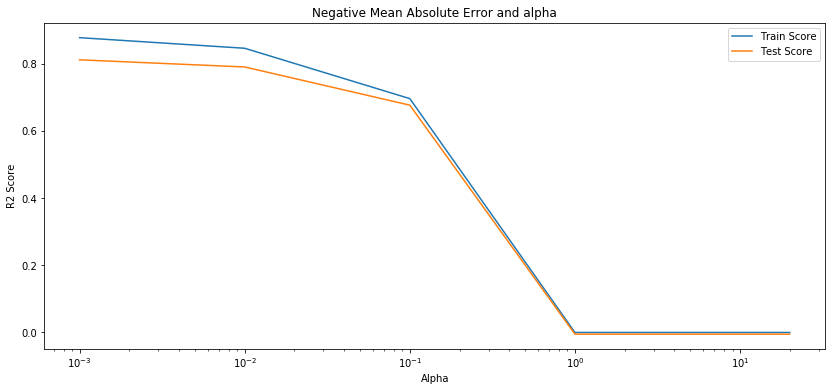

In [115]:
# Plotting mean test and train scoes with alpha.

plt.figure(figsize=(14,6))
plt.plot(cv_result_l["param_alpha"], cv_result_l["mean_train_score"])
plt.plot(cv_result_l["param_alpha"], cv_result_l["mean_test_score"])
plt.xscale("log")
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(["Train Score", "Test Score"], loc = "upper right")
plt.ylabel("R2 Score")
plt.xlabel("Alpha")
plt.show()

In [116]:
# Checking the best parameter(Alpha value) for model.

model_cv.best_params_

{'alpha': 0.001}

In [117]:
# After getting the optimal value of alpha and create new model using that alpha value.

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
# Get the prediction of model on train data and test data.

y_train_pred = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

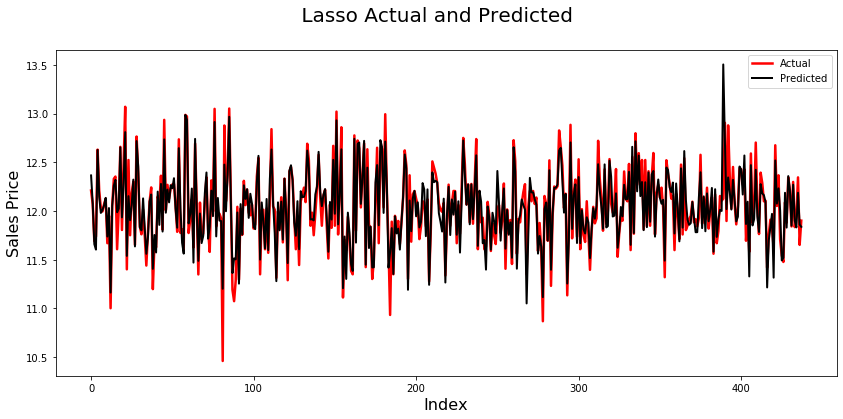

In [119]:
# Lasso Regression with all features: Actual vs Predicted

a = [i for i in range(0, y_test.shape[0], 1)]
fig = plt.figure(figsize = (14, 6))

plt.plot(a, y_test, color = "red", linewidth = 2.5, linestyle = "-")
plt.plot(a, y_test_pred_lasso, color = "black",  linewidth = 2.0, linestyle = "-")

fig.suptitle(" Lasso Actual and Predicted", fontsize=20)               
plt.legend(["Actual", "Predicted"], loc = "upper right")
plt.xlabel('Index', fontsize = 16)                               
plt.ylabel('Sales Price', fontsize = 16)                         
plt.show()

In [120]:
# Print the R-Squared score of model for Train and Test data.

print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred_lasso))

0.8764467927033535
0.8640190855437124


In [121]:
# Create a dataframe for getting the coefficient according to features.

model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train.columns
cols.insert(0, "const")

lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ["Feature", "Coefficient"]

In [122]:
# Sort the features based on Coefficient.

lasso_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.904955
7,GarageCars,0.135271
1,OverallCond,0.116649
46,SaleType_Oth,0.076096
36,Exterior2nd_Stucco,0.072450
24,Neighborhood_OldTown,0.067029
2,BsmtFinSF1,0.066768
8,House_Age,0.065021
29,Condition1_PosA,0.056989
12,MSZoning_RM,0.054148


## 7.3. Perform Ridge Regression

In [123]:
# Create object of Ridge() and fit train data in model.

ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
# Get the prediction of model on train data and test data.

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [125]:
# Print the R-Squared score of model for Train and Test data.

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8962774635767539
0.8461699240024638


- As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

- Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [126]:
# Perform the GridSearchCV for different values of alpha.
# Perform Cross Validation.

folds  = KFold(n_splits = 10, shuffle = True, random_state = 42)

Hyperparameter = {"alpha" : [0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

Ridge_model = Ridge()

model_cv = GridSearchCV(estimator = Ridge_model,
                        param_grid = Hyperparameter,
                        scoring = "r2",
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [127]:
# Getting mean test and train scores with alpha.

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r["param_alpha"] = cv_result_r["param_alpha"].astype("float32")
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003591,1.111978e-03,0.001097,0.000536,0.001,{'alpha': 0.001},0.931714,0.893995,0.132151,0.889244,0.905986,0.894979,0.916904,0.898394,0.914610,0.913840,0.829182,0.232670,7,0.891376,0.894720,0.934038,0.894496,0.894089,0.895613,0.893402,0.893285,0.894126,0.893818,0.897896,0.012093
1,0.002593,6.616958e-04,0.001299,0.000785,0.010,{'alpha': 0.01},0.931963,0.893733,0.131986,0.889936,0.906161,0.895019,0.916939,0.898204,0.914633,0.914002,0.829258,0.232750,6,0.891374,0.894719,0.934036,0.894493,0.894088,0.895612,0.893401,0.893284,0.894125,0.893816,0.897895,0.012093
2,0.001995,5.647049e-07,0.000800,0.000400,0.100,{'alpha': 0.1},0.933774,0.891309,0.130365,0.895498,0.907688,0.895404,0.917241,0.896433,0.914817,0.915214,0.829774,0.233474,3,0.891218,0.894622,0.933941,0.894317,0.893960,0.895503,0.893286,0.893197,0.894012,0.893698,0.897775,0.012102
3,0.002494,8.043491e-04,0.000997,0.000446,0.200,{'alpha': 0.2},0.934879,0.889028,0.128623,0.899647,0.909013,0.895800,0.917503,0.894756,0.914951,0.916022,0.830022,0.234159,1,0.890890,0.894416,0.933725,0.893936,0.893670,0.895257,0.893028,0.893012,0.893759,0.893434,0.897513,0.012118
4,0.002294,4.568249e-04,0.000998,0.000631,0.500,{'alpha': 0.5},0.935993,0.884216,0.123708,0.905928,0.911642,0.896858,0.918043,0.891186,0.915176,0.917165,0.829992,0.235854,2,0.889713,0.893666,0.932881,0.892540,0.892526,0.894289,0.892008,0.892332,0.892763,0.892415,0.896513,0.012175


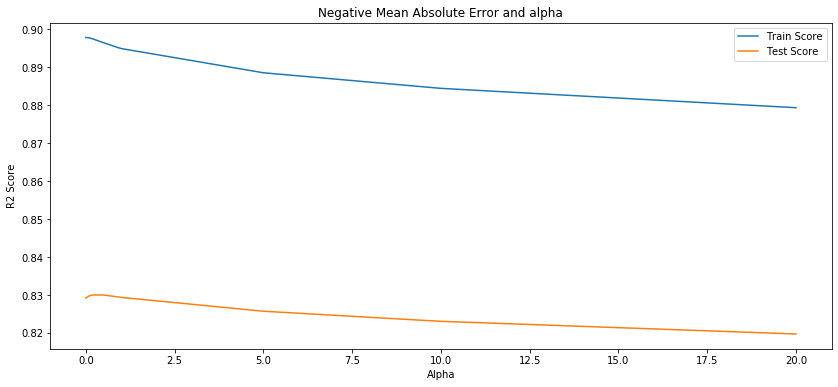

In [128]:
# Plotting mean test and train scoes with alpha.

plt.figure(figsize = (14,6))
plt.plot(cv_result_r["param_alpha"], cv_result_r["mean_train_score"])
plt.plot(cv_result_r["param_alpha"], cv_result_r["mean_test_score"])
plt.legend(["Train Score", "Test Score"], loc = "upper right")
plt.title("Negative Mean Absolute Error and alpha")
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [129]:
# Checking the best parameter(Alpha value)

model_cv.best_params_

{'alpha': 0.2}

In [130]:
# Create object of Ridge() and fit data in model for optimal alpha value.

ridge = Ridge(alpha = 0.2)
ridge.fit(X_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [131]:
# Get the prediction of model on train data and test data.

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

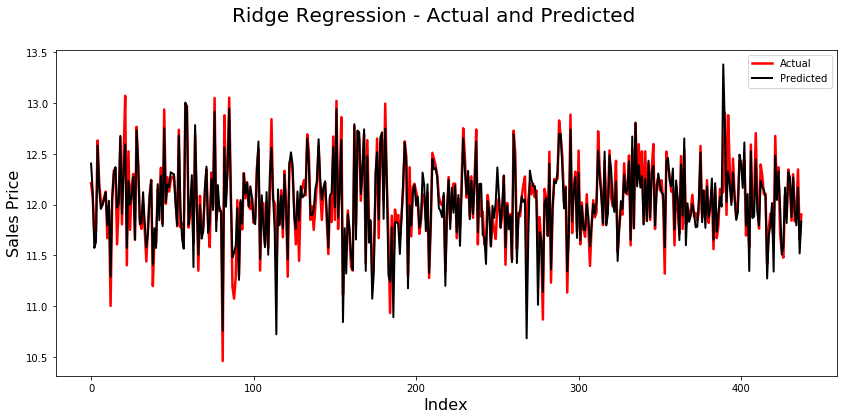

In [132]:
# Ridge Regression with all features: Actual vs Predicted

a = [i for i in range(0, y_test.shape[0], 1)]
fig = plt.figure(figsize = (14, 6))

plt.plot(a, y_test, color = "red", linewidth = 2.5, linestyle = "-")
plt.plot(a, y_test_pred, color = "black",  linewidth = 2.0, linestyle = "-")

fig.suptitle("Ridge Regression - Actual and Predicted", fontsize=20)               
plt.legend(["Actual", "Predicted"], loc = "upper right")
plt.xlabel('Index', fontsize = 16)                               
plt.ylabel('Sales Price', fontsize = 16)                         
plt.show()

In [133]:
# Print the R-Squared score of model for Train and Test data.

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.8959545605489354
0.8519863081590249


In [134]:
# Create a dataframe for getting the coefficient according to features.

model_parameter = list(ridge.coef_)
model_parameter.insert(0, ridge.intercept_)
cols = X_train.columns
cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_coef.columns = ["Feature", "Coefficient"]

In [135]:
# Sort the features based on Coefficient.

ridge_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.581801
12,MSZoning_RM,0.417151
11,MSZoning_RL,0.416191
10,MSZoning_RH,0.395937
13,LotConfig_FR3,0.324119
47,SaleCondition_Alloca,0.230786
39,Functional_Maj2,0.205638
46,SaleType_Oth,0.178709
7,GarageCars,0.133622
44,SaleType_ConLD,0.107917


## Step 8 : Conclusion / Observation.

### After the modeling by using Ridge and Lasso -

##### For Ridge Regression Model :
- The R-Squared score of model for Train Data is = <font color = "red">0.89</font>
- The R-Squared score of model for Test Data is = <font color = "red">0.85</font>
- The best alpha value for Ridge Model is = <font color = "red">0.2</font>

##### For Lasso Regression Model :
- The R-Sqaured score of model for Train Data is = <font color = "red">0.87</font>
- The R-Squared score of model for Test Data is = <font color = "red">0.86</font>
- The best alpha value for Lasso Model is = <font color = "red">0.001</font>

##### <font color = "blue">After creating model in both Ridge and Lasso Regression we can see that the R-Squared score for Ridge on Train Data is better than Lasso.
##### <font color = "blue">But Lasso has better R-Squared score for Test Data than Ridge. 
##### <font color = "blue">So, as Lasso providing the better score on Test Data we will choose <font size = 4>Lasso model as our final model. </font>

##### After comparing both the model the models providing the below features as best explaining -
##### * Top features that affect House Prices based on "Ridge Regression Model" - 

1. OverallQual	
2. MSZoning_RM	
3. MSZoning_RL	
4. MSZoning_RH	
5. LotConfig_FR3	
6. SaleCondition_Alloca	
7. Functional_Maj2	
8. SaleType_Oth	
9. GarageCars	
10. SaleType_ConLD

##### * Top features that affect House Prices based on "Lasso Regression Model" -
1. OverallQual	                       
2. GarageCars	             
3. OverallCond	             
4. SaleType_Oth	             
5. Exterior2nd_Stucco	     
6. Neighborhood_OldTown	     
7. BsmtFinSF1	             
8. House_Age	             
9. Condition1_PosA	         
10. MSZoning_RM	             

###### Suggestions for Surprise Housing -

- These predictors affecting the price of the house should be kept in check.  
- The higher values of positive coefficients suggest a high sale value.
- The higher values of negative coeficients suggest a decrease in sale value.
- When the market value of the property is lower than the Predicted Sale Price, its the time to buy.
- When market values reach the Predicted sale values or higher, its time to flip.

##### <font size = 4>Lastly</font>,  we need to find out best features that describes the price of the house, 
##### <font color = "blue">For this we are checking the top features for both final models created using Ridge and Lasso and then choosing the below feature accordingly.

1. OverallQual
2. MSZoning
3. LotConfig
4. SaleCondition
5. Functional
6. SaleType
7. GarageCars
8. OverallCond
9. Exterior2nd
10. Neighborhood
11. BsmtFinSF1
12. House_Age

#### =============================================================================================================

# For subjective questions following code is used.

### Question 1.
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the changes is implemented?

#### Answer :-

### Ridge Regression.

- Now, we have our original optimal alpha for ridge regression is 0.2.
- So, now we will double it and put it in model as 0.4

In [136]:
# Performing Ridge Regression.

# Create object of Ridge() and fit data in model for optimal alpha value.

ridge = Ridge(alpha = 0.4)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [137]:
# Get the prediction of model on train data and test data.

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [138]:
# Print the R-Squared score of model for Train and Test data.

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.8953725974536042
0.8551700639159552


In [139]:
# Create a dataframe for getting the coefficient according to features.

model_parameter = list(ridge.coef_)
model_parameter.insert(0, ridge.intercept_)
cols = X_train.columns
cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_coef.columns = ["Feature", "Coefficient"]

In [140]:
# Sort the features based on Coefficient.

ridge_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.647842
12,MSZoning_RM,0.347314
11,MSZoning_RL,0.342025
10,MSZoning_RH,0.326009
13,LotConfig_FR3,0.256489
47,SaleCondition_Alloca,0.214376
39,Functional_Maj2,0.181504
46,SaleType_Oth,0.157019
7,GarageCars,0.133678
36,Exterior2nd_Stucco,0.105274


### Lasso Regression.

- Now, we have our original optimal alpha for lasso regression is 0.001.
- So, now we will double it and put it in model as 0.002

In [141]:
# After getting the optimal value of alpha and create new model using that alpha value.

lasso = Lasso(alpha = 0.002)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
# Get the prediction of model on train data and test data.

y_train_pred = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

In [143]:
# Print the R-Squared score of model for Train and Test data.

print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred_lasso))

0.8659656460706279
0.8577888525135262


In [144]:
# Create a dataframe for getting the coefficient according to features.

model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train.columns
cols.insert(0, "const")

lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ["Feature", "Coefficient"]

In [145]:
# Sort the features based on Coefficient.

lasso_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,OverallQual,11.932307
7,GarageCars,0.134268
1,OverallCond,0.125700
2,BsmtFinSF1,0.065829
8,House_Age,0.065570
46,SaleType_Oth,0.057617
29,Condition1_PosA,0.051238
24,Neighborhood_OldTown,0.034970
49,SaleCondition_Partial,0.034852
36,Exterior2nd_Stucco,0.034183


Observations for both model is written in PDF of subjective questions answers.

### Question 3.
After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important variables now?

#### Answer :-

Our top 5 features of lasso model are :
1. OverallQual
2. GarageCars
3. OverallCond
4. SaleType_Oth
5. Exterior2nd_Stucco

Now we are dropping the top 5 features from data and then create new model again.

In [146]:
# Check the shape of data.

X_train.shape

(1021, 50)

In [147]:
# Dropping top 5 features from X_train and X_test.

X_train = X_train.drop(["OverallQual", "GarageCars", "OverallCond", "SaleType_Oth", "Exterior2nd_Stucco"], axis = 1)
X_test = X_test.drop(["OverallQual", "GarageCars", "OverallCond", "SaleType_Oth", "Exterior2nd_Stucco"], axis = 1)
print(X_train.shape)
print(X_test.shape)

(1021, 45)
(438, 45)


Create new lasso model now.

In [148]:
# After getting the optimal value of alpha and create new model using that alpha value.

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [149]:
# Get the prediction of model on train data and test data.

y_train_pred = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

In [150]:
# Print the R-Squared score of model for Train and Test data.

print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred_lasso))

0.807392189258209
0.8070506664474577


In [151]:
# Create a dataframe for getting the coefficient according to features.

model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train.columns
cols.insert(0, "const")

lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ["Feature", "Coefficient"]

In [152]:
# Sort the features based on Coefficient.

lasso_coef.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
0,BsmtFinSF1,11.863127
5,House_Age,0.191821
21,Neighborhood_OldTown,0.131626
42,SaleCondition_Alloca,0.120936
25,Condition1_Norm,0.107276
9,MSZoning_RM,0.098436
44,SaleCondition_Partial,0.085813
7,MSZoning_RH,0.083547
26,Condition1_PosA,0.056894
33,Foundation_Slab,0.054671


Observations for both model is written in PDF of subjective questions answers.